In [1]:
#Import Libraries, set parametes and create model
import numpy as np
import pybamm
import matplotlib.pyplot as plt
#%matplotlib widget

In [2]:
pybamm.set_logging_level("NOTICE")  # To see updates after each steps of charging and discharging
# solution  = [] # blank array defined for storing solutions after simulation
params = pybamm.ParameterValues("Chen2020")    # calling parameters of chen from pybamm
params.update({"SEI kinetic rate constant [m.s-1]": 1e-15,  # updating rate const from -15to-14 for easy calculation
               "Ambient temperature [K]": 298})
spm = pybamm.lithium_ion.SPM(  # Single Particle Model (SPM) is selected with sub models given below
    {"SEI": "ec reaction limited",  # capacity fade model
        "thermal": "lumped",  # thermal model
        "SEI porosity change": "true",  # porosity change model
        "SEI film resistance": "distributed"}  # film resistance model
)

In [3]:
# Define the constants
n:int = int(input('Enter number of cycles : '))
# n_p=pulse(all cyc), n_c=C_value(each_cyc), rt=rest_time(each_cyc)
# if ">4.2V", cc-cv graph - define 2 functions and call them in if...else as fast() & pulse()
# n_p:int = int(input("Pulse number for all cycle : "))

#From what cycle onwards should updated cycle parameters take effect
rg:int = n

In [4]:
# Define fuction for returning experiment cycle with user parameters

def cycle_with_params(C_value: str, rest_time: str) -> list[str]:

    cycle: list[str] = [
         f"Charge at {C_value} C for 1 minute or until 4.2 V (1 second period)",
         f"Rest for {rest_time} minutes (1 second period)"
         ]

    return cycle

In [5]:
from typing import final


# Define fuction for simulating experiment
def fast(num_cycles: int, solution_list) -> tuple[int, list]:
    '''
    Takes input number of cycles to simulate, and list of previous simulations
    returns number of entries in solution, and list of solutions
    '''
    # n_C: str = input("C value for each cycle : ")
    # rt: str = input("Rest time for each cycle : ")
    n_C: str = "2"
    rt: str = "5"
    cycle1: list[str] = ["Discharge at 5A until 2.5V", "Rest for 15 minutes"]
    cycle2: list[str] = cycle_with_params(n_C, rt)
    cycle3: list[str] = ["Charge at 15W until 4.2V", "Hold at 4.2V until 0.01A"]
    # cycle3: list[str] = None
    
    solution: list[pybamm.Solution] = solution_list
    num_entries = 0

    exp1 = pybamm.Experiment(operating_conditions=[tuple(cycle1)])
    sim1 = pybamm.Simulation(spm, experiment=exp1, parameter_values=params)
    exp2 = pybamm.Experiment(operating_conditions=[tuple(cycle2)])
    sim2 = pybamm.Simulation(spm, experiment=exp2, parameter_values=params)
    exp3 = pybamm.Experiment(operating_conditions=[tuple(cycle3)])
    sim3 = pybamm.Simulation(spm, experiment=exp3, parameter_values=params)

    # When the simulation is run for the first time, the starting_solution is not defined
    if solution == []:
        sol1 = sim1.solve()
        pulse_duration = 360 # Pluse duation is total duration of cycle (1 + 5) minutes
        while(pulse_duration == 360):
            #End time before solving
            initial_time = sol1["Time [s]"].entries[-1]
            sol1 = sim2.solve(starting_solution=sol1)
            #End time after solving
            final_time = sol1["Time [s]"].entries[-1]

            pulse_duration = final_time - initial_time
            print(pulse_duration)

        sol1 = sim3.solve(starting_solution=sol1)
        num_entries: int = len(sol1["Time [s]"].entries)
        # solving and writing results to variable sol1
        solution.append(sol1) # writing sol1 to solution array

    for i in range(num_cycles):
        sol2 = sim1.solve(starting_solution=solution[-1])
        pulse_duration = 360 # Pluse duation is total duration of cycle (1 + 5) minutes
        while(pulse_duration == 360):
            #End time before solving
            initial_time = sol2["Time [s]"].entries[-1]
            sol2 = sim2.solve(starting_solution=sol2)
            #End time after solving
            final_time = sol2["Time [s]"].entries[-1]

            pulse_duration = final_time - initial_time
            print(pulse_duration)
        sol2 = sim3.solve(starting_solution=sol2)
        solution.append(sol2)

    return num_entries, solution


2023-06-30 11:47:00.924 - [NOTICE] logger.func(15): Cycle 1/1 (4.668 ms elapsed) --------------------
2023-06-30 11:47:00.925 - [NOTICE] logger.func(15): Cycle 1/1, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:47:01.155 - [NOTICE] logger.func(15): Cycle 1/1, step 2/2: Rest for 15 minutes
2023-06-30 11:47:01.671 - [NOTICE] logger.func(15): Finish experiment simulation, took 751.424 ms
2023-06-30 11:47:02.114 - [NOTICE] logger.func(15): Cycle 2/2 (128.400 us elapsed) --------------------
2023-06-30 11:47:02.115 - [NOTICE] logger.func(15): Cycle 2/2, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:02.177 - [NOTICE] logger.func(15): Cycle 2/2, step 2/2: Rest for 5 minutes
2023-06-30 11:47:02.548 - [NOTICE] logger.func(15): Finish experiment simulation, took 432.366 ms
2023-06-30 11:47:02.559 - [NOTICE] logger.func(15): Cycle 3/3 (82.800 us elapsed) --------------------
2023-06-30 11:47:02.559 - [NOTICE] logger.func(15): Cycle 3/3, step 1/2: Charge at 2 C for 1 mi

360.0


2023-06-30 11:47:02.789 - [NOTICE] logger.func(15): Finish experiment simulation, took 229.954 ms
2023-06-30 11:47:02.800 - [NOTICE] logger.func(15): Cycle 4/4 (70.800 us elapsed) --------------------
2023-06-30 11:47:02.801 - [NOTICE] logger.func(15): Cycle 4/4, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:02.807 - [NOTICE] logger.func(15): Cycle 4/4, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:03.093 - [NOTICE] logger.func(15): Finish experiment simulation, took 293.026 ms
2023-06-30 11:47:03.112 - [NOTICE] logger.func(15): Cycle 5/5 (79.600 us elapsed) --------------------
2023-06-30 11:47:03.113 - [NOTICE] logger.func(15): Cycle 5/5, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:03.121 - [NOTICE] logger.func(15): Cycle 5/5, step 2/2: Rest for 5 minutes
2023-06-30 11:47:03.315 - [NOTICE] logger.func(15): Finish experiment simulation, took 203.375 ms


360.0


2023-06-30 11:47:03.334 - [NOTICE] logger.func(15): Cycle 6/6 (67.600 us elapsed) --------------------
2023-06-30 11:47:03.335 - [NOTICE] logger.func(15): Cycle 6/6, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:03.341 - [NOTICE] logger.func(15): Cycle 6/6, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:03.553 - [NOTICE] logger.func(15): Finish experiment simulation, took 218.628 ms
2023-06-30 11:47:03.588 - [NOTICE] logger.func(15): Cycle 7/7 (4.048 ms elapsed) --------------------
2023-06-30 11:47:03.590 - [NOTICE] logger.func(15): Cycle 7/7, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:03.600 - [NOTICE] logger.func(15): Cycle 7/7, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:03.794 - [NOTICE] logger.func(15): Finish experiment simulation, took 210.400 ms
2023-06-30 11:47:03.822 - [NOTICE] logger.func(15): Cycle 8/8 (116.300 us elapsed) --------------------
2023-06-30 11:47:03.823 - [NOTICE] logger.func(15): Cycle 8/8, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:03.829 - [NOTICE] logger.func(15): Cycle 8/8, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:04.034 - [NOTICE] logger.func(15): Finish experiment simulation, took 212.258 ms
2023-06-30 11:47:04.073 - [NOTICE] logger.func(15): Cycle 9/9 (88.100 us elapsed) --------------------
2023-06-30 11:47:04.076 - [NOTICE] logger.func(15): Cycle 9/9, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:04.085 - [NOTICE] logger.func(15): Cycle 9/9, step 2/2: Rest for 5 minutes
2023-06-30 11:47:04.279 - [NOTICE] logger.func(15): Finish experiment simulation, took 205.317 ms


360.0


2023-06-30 11:47:04.320 - [NOTICE] logger.func(15): Cycle 10/10 (68.700 us elapsed) --------------------
2023-06-30 11:47:04.321 - [NOTICE] logger.func(15): Cycle 10/10, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:04.331 - [NOTICE] logger.func(15): Cycle 10/10, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:04.527 - [NOTICE] logger.func(15): Finish experiment simulation, took 207.926 ms
2023-06-30 11:47:04.571 - [NOTICE] logger.func(15): Cycle 11/11 (102.600 us elapsed) --------------------
2023-06-30 11:47:04.572 - [NOTICE] logger.func(15): Cycle 11/11, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:04.578 - [NOTICE] logger.func(15): Cycle 11/11, step 2/2: Rest for 5 minutes
2023-06-30 11:47:04.766 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.175 ms


360.0


2023-06-30 11:47:04.848 - [NOTICE] logger.func(15): Cycle 12/12 (74.700 us elapsed) --------------------
2023-06-30 11:47:04.850 - [NOTICE] logger.func(15): Cycle 12/12, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:04.855 - [NOTICE] logger.func(15): Cycle 12/12, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:05.165 - [NOTICE] logger.func(15): Finish experiment simulation, took 317.013 ms


359.9999999999991


2023-06-30 11:47:05.562 - [NOTICE] logger.func(15): Cycle 13/13 (89.300 us elapsed) --------------------
2023-06-30 11:47:05.562 - [NOTICE] logger.func(15): Cycle 13/13, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:47:05.714 - [NOTICE] logger.func(15): Cycle 13/13, step 2/2: Hold at 4.2V until 0.01A
2023-06-30 11:47:06.051 - [NOTICE] logger.func(15): Finish experiment simulation, took 488.377 ms
2023-06-30 11:47:06.116 - [NOTICE] logger.func(15): Cycle 14/14 (75.900 us elapsed) --------------------
2023-06-30 11:47:06.117 - [NOTICE] logger.func(15): Cycle 14/14, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:47:06.135 - [NOTICE] logger.func(15): Cycle 14/14, step 2/2: Rest for 15 minutes
2023-06-30 11:47:06.568 - [NOTICE] logger.func(15): Finish experiment simulation, took 451.105 ms
2023-06-30 11:47:06.656 - [NOTICE] logger.func(15): Cycle 15/15 (79.400 us elapsed) --------------------
2023-06-30 11:47:06.657 - [NOTICE] logger.func(15): Cycle 15/15, step 1/2: Charge at 2 C for

360.0


2023-06-30 11:47:07.284 - [NOTICE] logger.func(15): Finish experiment simulation, took 336.226 ms
2023-06-30 11:47:07.384 - [NOTICE] logger.func(15): Cycle 17/17 (322.400 us elapsed) --------------------
2023-06-30 11:47:07.386 - [NOTICE] logger.func(15): Cycle 17/17, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:07.398 - [NOTICE] logger.func(15): Cycle 17/17, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:07.829 - [NOTICE] logger.func(15): Finish experiment simulation, took 444.439 ms
2023-06-30 11:47:07.926 - [NOTICE] logger.func(15): Cycle 18/18 (108.200 us elapsed) --------------------
2023-06-30 11:47:07.929 - [NOTICE] logger.func(15): Cycle 18/18, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:07.937 - [NOTICE] logger.func(15): Cycle 18/18, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:08.336 - [NOTICE] logger.func(15): Finish experiment simulation, took 409.494 ms
2023-06-30 11:47:08.404 - [NOTICE] logger.func(15): Cycle 19/19 (67.700 us elapsed) --------------------
2023-06-30 11:47:08.405 - [NOTICE] logger.func(15): Cycle 19/19, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:08.410 - [NOTICE] logger.func(15): Cycle 19/19, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:08.871 - [NOTICE] logger.func(15): Finish experiment simulation, took 465.585 ms
2023-06-30 11:47:09.010 - [NOTICE] logger.func(15): Cycle 20/20 (87.100 us elapsed) --------------------
2023-06-30 11:47:09.011 - [NOTICE] logger.func(15): Cycle 20/20, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:09.019 - [NOTICE] logger.func(15): Cycle 20/20, step 2/2: Rest for 5 minutes
2023-06-30 11:47:09.226 - [NOTICE] logger.func(15): Finish experiment simulation, took 215.311 ms


360.0


2023-06-30 11:47:09.298 - [NOTICE] logger.func(15): Cycle 21/21 (75.900 us elapsed) --------------------
2023-06-30 11:47:09.298 - [NOTICE] logger.func(15): Cycle 21/21, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:09.302 - [NOTICE] logger.func(15): Cycle 21/21, step 2/2: Rest for 5 minutes
2023-06-30 11:47:09.481 - [NOTICE] logger.func(15): Finish experiment simulation, took 182.526 ms


360.0


2023-06-30 11:47:09.558 - [NOTICE] logger.func(15): Cycle 22/22 (60.100 us elapsed) --------------------
2023-06-30 11:47:09.558 - [NOTICE] logger.func(15): Cycle 22/22, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:09.564 - [NOTICE] logger.func(15): Cycle 22/22, step 2/2: Rest for 5 minutes
2023-06-30 11:47:09.741 - [NOTICE] logger.func(15): Finish experiment simulation, took 182.822 ms


360.0


2023-06-30 11:47:09.830 - [NOTICE] logger.func(15): Cycle 23/23 (59.400 us elapsed) --------------------
2023-06-30 11:47:09.831 - [NOTICE] logger.func(15): Cycle 23/23, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:09.835 - [NOTICE] logger.func(15): Cycle 23/23, step 2/2: Rest for 5 minutes
2023-06-30 11:47:10.012 - [NOTICE] logger.func(15): Finish experiment simulation, took 181.488 ms


360.0


2023-06-30 11:47:10.104 - [NOTICE] logger.func(15): Cycle 24/24 (68.300 us elapsed) --------------------
2023-06-30 11:47:10.105 - [NOTICE] logger.func(15): Cycle 24/24, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:10.110 - [NOTICE] logger.func(15): Cycle 24/24, step 2/2: Rest for 5 minutes
2023-06-30 11:47:10.291 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.902 ms


360.0


2023-06-30 11:47:10.385 - [NOTICE] logger.func(15): Cycle 25/25 (60.000 us elapsed) --------------------
2023-06-30 11:47:10.386 - [NOTICE] logger.func(15): Cycle 25/25, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:10.390 - [NOTICE] logger.func(15): Cycle 25/25, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:10.607 - [NOTICE] logger.func(15): Finish experiment simulation, took 221.924 ms
2023-06-30 11:47:10.701 - [NOTICE] logger.func(15): Cycle 26/26 (57.700 us elapsed) --------------------
2023-06-30 11:47:10.701 - [NOTICE] logger.func(15): Cycle 26/26, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:10.706 - [NOTICE] logger.func(15): Cycle 26/26, step 2/2: Rest for 5 minutes
2023-06-30 11:47:10.881 - [NOTICE] logger.func(15): Finish experiment simulation, took 179.716 ms


360.0


2023-06-30 11:47:10.976 - [NOTICE] logger.func(15): Cycle 27/27 (63.700 us elapsed) --------------------
2023-06-30 11:47:10.977 - [NOTICE] logger.func(15): Cycle 27/27, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:10.981 - [NOTICE] logger.func(15): Cycle 27/27, step 2/2: Rest for 5 minutes
2023-06-30 11:47:11.164 - [NOTICE] logger.func(15): Finish experiment simulation, took 186.792 ms


360.0


2023-06-30 11:47:11.262 - [NOTICE] logger.func(15): Cycle 28/28 (60.200 us elapsed) --------------------
2023-06-30 11:47:11.263 - [NOTICE] logger.func(15): Cycle 28/28, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:11.268 - [NOTICE] logger.func(15): Cycle 28/28, step 2/2: Rest for 5 minutes
2023-06-30 11:47:11.449 - [NOTICE] logger.func(15): Finish experiment simulation, took 186.927 ms


360.0


2023-06-30 11:47:11.562 - [NOTICE] logger.func(15): Cycle 29/29 (61.400 us elapsed) --------------------
2023-06-30 11:47:11.562 - [NOTICE] logger.func(15): Cycle 29/29, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:11.567 - [NOTICE] logger.func(15): Cycle 29/29, step 2/2: Rest for 5 minutes
2023-06-30 11:47:11.755 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.902 ms


360.0


2023-06-30 11:47:11.872 - [NOTICE] logger.func(15): Cycle 30/30 (62.600 us elapsed) --------------------
2023-06-30 11:47:11.872 - [NOTICE] logger.func(15): Cycle 30/30, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:11.876 - [NOTICE] logger.func(15): Cycle 30/30, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:12.181 - [NOTICE] logger.func(15): Finish experiment simulation, took 309.384 ms
2023-06-30 11:47:12.292 - [NOTICE] logger.func(15): Cycle 31/31 (64.700 us elapsed) --------------------
2023-06-30 11:47:12.293 - [NOTICE] logger.func(15): Cycle 31/31, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:12.297 - [NOTICE] logger.func(15): Cycle 31/31, step 2/2: Rest for 5 minutes
2023-06-30 11:47:12.475 - [NOTICE] logger.func(15): Finish experiment simulation, took 181.921 ms


360.0


2023-06-30 11:47:12.589 - [NOTICE] logger.func(15): Cycle 32/32 (61.900 us elapsed) --------------------
2023-06-30 11:47:12.590 - [NOTICE] logger.func(15): Cycle 32/32, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:12.595 - [NOTICE] logger.func(15): Cycle 32/32, step 2/2: Rest for 5 minutes
2023-06-30 11:47:12.771 - [NOTICE] logger.func(15): Finish experiment simulation, took 181.610 ms


360.0


2023-06-30 11:47:12.889 - [NOTICE] logger.func(15): Cycle 33/33 (62.800 us elapsed) --------------------
2023-06-30 11:47:12.890 - [NOTICE] logger.func(15): Cycle 33/33, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:12.895 - [NOTICE] logger.func(15): Cycle 33/33, step 2/2: Rest for 5 minutes
2023-06-30 11:47:13.071 - [NOTICE] logger.func(15): Finish experiment simulation, took 180.898 ms


360.0


2023-06-30 11:47:13.194 - [NOTICE] logger.func(15): Cycle 34/34 (62.600 us elapsed) --------------------
2023-06-30 11:47:13.196 - [NOTICE] logger.func(15): Cycle 34/34, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:13.200 - [NOTICE] logger.func(15): Cycle 34/34, step 2/2: Rest for 5 minutes
2023-06-30 11:47:13.379 - [NOTICE] logger.func(15): Finish experiment simulation, took 183.790 ms


360.0


2023-06-30 11:47:13.511 - [NOTICE] logger.func(15): Cycle 35/35 (63.200 us elapsed) --------------------
2023-06-30 11:47:13.511 - [NOTICE] logger.func(15): Cycle 35/35, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:13.517 - [NOTICE] logger.func(15): Cycle 35/35, step 2/2: Rest for 5 minutes
2023-06-30 11:47:13.701 - [NOTICE] logger.func(15): Finish experiment simulation, took 190.125 ms


360.0


2023-06-30 11:47:13.835 - [NOTICE] logger.func(15): Cycle 36/36 (61.000 us elapsed) --------------------
2023-06-30 11:47:13.836 - [NOTICE] logger.func(15): Cycle 36/36, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:13.844 - [NOTICE] logger.func(15): Cycle 36/36, step 2/2: Rest for 5 minutes
2023-06-30 11:47:14.025 - [NOTICE] logger.func(15): Finish experiment simulation, took 189.921 ms


360.0


2023-06-30 11:47:14.161 - [NOTICE] logger.func(15): Cycle 37/37 (65.600 us elapsed) --------------------
2023-06-30 11:47:14.162 - [NOTICE] logger.func(15): Cycle 37/37, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:47:14.174 - [NOTICE] logger.func(15): Cycle 37/37, step 2/2: Hold at 4.2V until 0.01A
2023-06-30 11:47:14.367 - [NOTICE] logger.func(15): Finish experiment simulation, took 204.719 ms


342.2130444128961


2023-06-30 11:47:14.368 - [NOTICE] logger.func(15): Cycle 38/38 (87.500 us elapsed) --------------------
2023-06-30 11:47:14.369 - [NOTICE] logger.func(15): Cycle 38/38, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:47:14.383 - [NOTICE] logger.func(15): Cycle 38/38, step 2/2: Rest for 15 minutes
2023-06-30 11:47:14.553 - [NOTICE] logger.func(15): Finish experiment simulation, took 184.768 ms
2023-06-30 11:47:14.688 - [NOTICE] logger.func(15): Cycle 39/39 (115.900 us elapsed) --------------------
2023-06-30 11:47:14.689 - [NOTICE] logger.func(15): Cycle 39/39, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:14.693 - [NOTICE] logger.func(15): Cycle 39/39, step 2/2: Rest for 5 minutes
2023-06-30 11:47:14.871 - [NOTICE] logger.func(15): Finish experiment simulation, took 182.602 ms
2023-06-30 11:47:15.014 - [NOTICE] logger.func(15): Cycle 40/40 (66.800 us elapsed) --------------------
2023-06-30 11:47:15.015 - [NOTICE] logger.func(15): Cycle 40/40, step 1/2: Charg

360.0


2023-06-30 11:47:15.351 - [NOTICE] logger.func(15): Cycle 41/41 (59.400 us elapsed) --------------------
2023-06-30 11:47:15.351 - [NOTICE] logger.func(15): Cycle 41/41, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:15.356 - [NOTICE] logger.func(15): Cycle 41/41, step 2/2: Rest for 5 minutes
2023-06-30 11:47:15.535 - [NOTICE] logger.func(15): Finish experiment simulation, took 184.295 ms


360.0


2023-06-30 11:47:15.689 - [NOTICE] logger.func(15): Cycle 42/42 (68.500 us elapsed) --------------------
2023-06-30 11:47:15.690 - [NOTICE] logger.func(15): Cycle 42/42, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:15.694 - [NOTICE] logger.func(15): Cycle 42/42, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:16.033 - [NOTICE] logger.func(15): Finish experiment simulation, took 343.250 ms
2023-06-30 11:47:16.234 - [NOTICE] logger.func(15): Cycle 43/43 (62.500 us elapsed) --------------------
2023-06-30 11:47:16.235 - [NOTICE] logger.func(15): Cycle 43/43, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:16.240 - [NOTICE] logger.func(15): Cycle 43/43, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:16.449 - [NOTICE] logger.func(15): Finish experiment simulation, took 213.277 ms
2023-06-30 11:47:16.652 - [NOTICE] logger.func(15): Cycle 44/44 (103.300 us elapsed) --------------------
2023-06-30 11:47:16.652 - [NOTICE] logger.func(15): Cycle 44/44, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:16.656 - [NOTICE] logger.func(15): Cycle 44/44, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:16.859 - [NOTICE] logger.func(15): Finish experiment simulation, took 206.520 ms
2023-06-30 11:47:17.042 - [NOTICE] logger.func(15): Cycle 45/45 (63.600 us elapsed) --------------------
2023-06-30 11:47:17.042 - [NOTICE] logger.func(15): Cycle 45/45, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:17.047 - [NOTICE] logger.func(15): Cycle 45/45, step 2/2: Rest for 5 minutes
2023-06-30 11:47:17.255 - [NOTICE] logger.func(15): Finish experiment simulation, took 212.160 ms


360.0


2023-06-30 11:47:17.444 - [NOTICE] logger.func(15): Cycle 46/46 (94.300 us elapsed) --------------------
2023-06-30 11:47:17.445 - [NOTICE] logger.func(15): Cycle 46/46, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:17.450 - [NOTICE] logger.func(15): Cycle 46/46, step 2/2: Rest for 5 minutes
2023-06-30 11:47:17.637 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.366 ms


360.0


2023-06-30 11:47:17.807 - [NOTICE] logger.func(15): Cycle 47/47 (62.300 us elapsed) --------------------
2023-06-30 11:47:17.808 - [NOTICE] logger.func(15): Cycle 47/47, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:17.812 - [NOTICE] logger.func(15): Cycle 47/47, step 2/2: Rest for 5 minutes
2023-06-30 11:47:17.993 - [NOTICE] logger.func(15): Finish experiment simulation, took 184.510 ms


360.0


2023-06-30 11:47:18.181 - [NOTICE] logger.func(15): Cycle 48/48 (74.300 us elapsed) --------------------
2023-06-30 11:47:18.182 - [NOTICE] logger.func(15): Cycle 48/48, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:18.187 - [NOTICE] logger.func(15): Cycle 48/48, step 2/2: Rest for 5 minutes
2023-06-30 11:47:18.376 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.589 ms


360.0


2023-06-30 11:47:18.557 - [NOTICE] logger.func(15): Cycle 49/49 (61.800 us elapsed) --------------------
2023-06-30 11:47:18.557 - [NOTICE] logger.func(15): Cycle 49/49, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:18.562 - [NOTICE] logger.func(15): Cycle 49/49, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:18.772 - [NOTICE] logger.func(15): Finish experiment simulation, took 215.535 ms
2023-06-30 11:47:18.952 - [NOTICE] logger.func(15): Cycle 50/50 (62.600 us elapsed) --------------------
2023-06-30 11:47:18.952 - [NOTICE] logger.func(15): Cycle 50/50, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:18.956 - [NOTICE] logger.func(15): Cycle 50/50, step 2/2: Rest for 5 minutes
2023-06-30 11:47:19.137 - [NOTICE] logger.func(15): Finish experiment simulation, took 184.102 ms


360.0


2023-06-30 11:47:19.358 - [NOTICE] logger.func(15): Cycle 51/51 (93.600 us elapsed) --------------------
2023-06-30 11:47:19.359 - [NOTICE] logger.func(15): Cycle 51/51, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:19.364 - [NOTICE] logger.func(15): Cycle 51/51, step 2/2: Rest for 5 minutes
2023-06-30 11:47:19.535 - [NOTICE] logger.func(15): Finish experiment simulation, took 176.069 ms


360.0


2023-06-30 11:47:19.722 - [NOTICE] logger.func(15): Cycle 52/52 (61.400 us elapsed) --------------------
2023-06-30 11:47:19.723 - [NOTICE] logger.func(15): Cycle 52/52, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:19.727 - [NOTICE] logger.func(15): Cycle 52/52, step 2/2: Rest for 5 minutes
2023-06-30 11:47:19.899 - [NOTICE] logger.func(15): Finish experiment simulation, took 176.121 ms


360.0


2023-06-30 11:47:20.090 - [NOTICE] logger.func(15): Cycle 53/53 (65.600 us elapsed) --------------------
2023-06-30 11:47:20.090 - [NOTICE] logger.func(15): Cycle 53/53, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:20.094 - [NOTICE] logger.func(15): Cycle 53/53, step 2/2: Rest for 5 minutes
2023-06-30 11:47:20.267 - [NOTICE] logger.func(15): Finish experiment simulation, took 176.213 ms


360.0


2023-06-30 11:47:20.458 - [NOTICE] logger.func(15): Cycle 54/54 (70.500 us elapsed) --------------------
2023-06-30 11:47:20.459 - [NOTICE] logger.func(15): Cycle 54/54, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:20.463 - [NOTICE] logger.func(15): Cycle 54/54, step 2/2: Rest for 5 minutes
2023-06-30 11:47:20.638 - [NOTICE] logger.func(15): Finish experiment simulation, took 179.110 ms


360.0


2023-06-30 11:47:20.829 - [NOTICE] logger.func(15): Cycle 55/55 (62.500 us elapsed) --------------------
2023-06-30 11:47:20.829 - [NOTICE] logger.func(15): Cycle 55/55, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:20.833 - [NOTICE] logger.func(15): Cycle 55/55, step 2/2: Rest for 5 minutes
2023-06-30 11:47:21.003 - [NOTICE] logger.func(15): Finish experiment simulation, took 173.842 ms


360.0


2023-06-30 11:47:21.200 - [NOTICE] logger.func(15): Cycle 56/56 (69.000 us elapsed) --------------------
2023-06-30 11:47:21.201 - [NOTICE] logger.func(15): Cycle 56/56, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:21.205 - [NOTICE] logger.func(15): Cycle 56/56, step 2/2: Rest for 5 minutes
2023-06-30 11:47:21.372 - [NOTICE] logger.func(15): Finish experiment simulation, took 171.811 ms


360.0


2023-06-30 11:47:21.576 - [NOTICE] logger.func(15): Cycle 57/57 (64.900 us elapsed) --------------------
2023-06-30 11:47:21.577 - [NOTICE] logger.func(15): Cycle 57/57, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:21.581 - [NOTICE] logger.func(15): Cycle 57/57, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:21.908 - [NOTICE] logger.func(15): Finish experiment simulation, took 330.690 ms
2023-06-30 11:47:22.115 - [NOTICE] logger.func(15): Cycle 58/58 (66.900 us elapsed) --------------------
2023-06-30 11:47:22.117 - [NOTICE] logger.func(15): Cycle 58/58, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:22.121 - [NOTICE] logger.func(15): Cycle 58/58, step 2/2: Rest for 5 minutes
2023-06-30 11:47:22.305 - [NOTICE] logger.func(15): Finish experiment simulation, took 188.762 ms


360.0


2023-06-30 11:47:22.513 - [NOTICE] logger.func(15): Cycle 59/59 (66.900 us elapsed) --------------------
2023-06-30 11:47:22.514 - [NOTICE] logger.func(15): Cycle 59/59, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:22.518 - [NOTICE] logger.func(15): Cycle 59/59, step 2/2: Rest for 5 minutes
2023-06-30 11:47:22.693 - [NOTICE] logger.func(15): Finish experiment simulation, took 179.172 ms


360.0


2023-06-30 11:47:22.910 - [NOTICE] logger.func(15): Cycle 60/60 (59.700 us elapsed) --------------------
2023-06-30 11:47:22.910 - [NOTICE] logger.func(15): Cycle 60/60, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:22.917 - [NOTICE] logger.func(15): Cycle 60/60, step 2/2: Rest for 5 minutes
2023-06-30 11:47:23.096 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.505 ms


360.0


2023-06-30 11:47:23.311 - [NOTICE] logger.func(15): Cycle 61/61 (69.800 us elapsed) --------------------
2023-06-30 11:47:23.311 - [NOTICE] logger.func(15): Cycle 61/61, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:47:23.324 - [NOTICE] logger.func(15): Cycle 61/61, step 2/2: Hold at 4.2V until 0.01A
2023-06-30 11:47:23.506 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.154 ms


341.26979720043164


2023-06-30 11:47:23.507 - [NOTICE] logger.func(15): Cycle 62/62 (59.200 us elapsed) --------------------
2023-06-30 11:47:23.507 - [NOTICE] logger.func(15): Cycle 62/62, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:47:23.518 - [NOTICE] logger.func(15): Cycle 62/62, step 2/2: Rest for 15 minutes
2023-06-30 11:47:23.684 - [NOTICE] logger.func(15): Finish experiment simulation, took 176.209 ms
2023-06-30 11:47:23.901 - [NOTICE] logger.func(15): Cycle 63/63 (60.900 us elapsed) --------------------
2023-06-30 11:47:23.902 - [NOTICE] logger.func(15): Cycle 63/63, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:23.905 - [NOTICE] logger.func(15): Cycle 63/63, step 2/2: Rest for 5 minutes
2023-06-30 11:47:24.074 - [NOTICE] logger.func(15): Finish experiment simulation, took 173.250 ms
2023-06-30 11:47:24.295 - [NOTICE] logger.func(15): Cycle 64/64 (64.300 us elapsed) --------------------
2023-06-30 11:47:24.296 - [NOTICE] logger.func(15): Cycle 64/64, step 1/2: Charge

360.0


2023-06-30 11:47:24.691 - [NOTICE] logger.func(15): Cycle 65/65 (65.300 us elapsed) --------------------
2023-06-30 11:47:24.692 - [NOTICE] logger.func(15): Cycle 65/65, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:24.696 - [NOTICE] logger.func(15): Cycle 65/65, step 2/2: Rest for 5 minutes
2023-06-30 11:47:24.865 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.688 ms


360.0


2023-06-30 11:47:25.098 - [NOTICE] logger.func(15): Cycle 66/66 (56.100 us elapsed) --------------------
2023-06-30 11:47:25.099 - [NOTICE] logger.func(15): Cycle 66/66, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:25.103 - [NOTICE] logger.func(15): Cycle 66/66, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:25.284 - [NOTICE] logger.func(15): Finish experiment simulation, took 183.858 ms
2023-06-30 11:47:25.546 - [NOTICE] logger.func(15): Cycle 67/67 (65.100 us elapsed) --------------------
2023-06-30 11:47:25.546 - [NOTICE] logger.func(15): Cycle 67/67, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:25.551 - [NOTICE] logger.func(15): Cycle 67/67, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:25.735 - [NOTICE] logger.func(15): Finish experiment simulation, took 187.916 ms
2023-06-30 11:47:26.050 - [NOTICE] logger.func(15): Cycle 68/68 (76.400 us elapsed) --------------------
2023-06-30 11:47:26.050 - [NOTICE] logger.func(15): Cycle 68/68, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:26.054 - [NOTICE] logger.func(15): Cycle 68/68, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:26.231 - [NOTICE] logger.func(15): Finish experiment simulation, took 180.026 ms
2023-06-30 11:47:26.475 - [NOTICE] logger.func(15): Cycle 69/69 (72.400 us elapsed) --------------------
2023-06-30 11:47:26.475 - [NOTICE] logger.func(15): Cycle 69/69, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:26.479 - [NOTICE] logger.func(15): Cycle 69/69, step 2/2: Rest for 5 minutes
2023-06-30 11:47:26.649 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.517 ms


360.0


2023-06-30 11:47:26.896 - [NOTICE] logger.func(15): Cycle 70/70 (67.000 us elapsed) --------------------
2023-06-30 11:47:26.897 - [NOTICE] logger.func(15): Cycle 70/70, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:26.901 - [NOTICE] logger.func(15): Cycle 70/70, step 2/2: Rest for 5 minutes
2023-06-30 11:47:27.072 - [NOTICE] logger.func(15): Finish experiment simulation, took 174.997 ms


360.0


2023-06-30 11:47:27.326 - [NOTICE] logger.func(15): Cycle 71/71 (63.500 us elapsed) --------------------
2023-06-30 11:47:27.328 - [NOTICE] logger.func(15): Cycle 71/71, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:27.332 - [NOTICE] logger.func(15): Cycle 71/71, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:27.534 - [NOTICE] logger.func(15): Finish experiment simulation, took 207.456 ms
2023-06-30 11:47:27.811 - [NOTICE] logger.func(15): Cycle 72/72 (61.600 us elapsed) --------------------
2023-06-30 11:47:27.812 - [NOTICE] logger.func(15): Cycle 72/72, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:27.816 - [NOTICE] logger.func(15): Cycle 72/72, step 2/2: Rest for 5 minutes
2023-06-30 11:47:27.984 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.868 ms


360.0


2023-06-30 11:47:28.238 - [NOTICE] logger.func(15): Cycle 73/73 (73.600 us elapsed) --------------------
2023-06-30 11:47:28.238 - [NOTICE] logger.func(15): Cycle 73/73, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:28.242 - [NOTICE] logger.func(15): Cycle 73/73, step 2/2: Rest for 5 minutes
2023-06-30 11:47:28.411 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.684 ms


360.0


2023-06-30 11:47:28.672 - [NOTICE] logger.func(15): Cycle 74/74 (128.100 us elapsed) --------------------
2023-06-30 11:47:28.673 - [NOTICE] logger.func(15): Cycle 74/74, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:28.677 - [NOTICE] logger.func(15): Cycle 74/74, step 2/2: Rest for 5 minutes
2023-06-30 11:47:28.844 - [NOTICE] logger.func(15): Finish experiment simulation, took 170.402 ms


360.0


2023-06-30 11:47:29.107 - [NOTICE] logger.func(15): Cycle 75/75 (67.400 us elapsed) --------------------
2023-06-30 11:47:29.108 - [NOTICE] logger.func(15): Cycle 75/75, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:29.112 - [NOTICE] logger.func(15): Cycle 75/75, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:29.459 - [NOTICE] logger.func(15): Finish experiment simulation, took 351.171 ms
2023-06-30 11:47:29.728 - [NOTICE] logger.func(15): Cycle 76/76 (69.000 us elapsed) --------------------
2023-06-30 11:47:29.728 - [NOTICE] logger.func(15): Cycle 76/76, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:29.732 - [NOTICE] logger.func(15): Cycle 76/76, step 2/2: Rest for 5 minutes
2023-06-30 11:47:29.901 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.721 ms


360.0


2023-06-30 11:47:30.174 - [NOTICE] logger.func(15): Cycle 77/77 (63.500 us elapsed) --------------------
2023-06-30 11:47:30.174 - [NOTICE] logger.func(15): Cycle 77/77, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:30.179 - [NOTICE] logger.func(15): Cycle 77/77, step 2/2: Rest for 5 minutes
2023-06-30 11:47:30.356 - [NOTICE] logger.func(15): Finish experiment simulation, took 181.480 ms


360.0


2023-06-30 11:47:30.632 - [NOTICE] logger.func(15): Cycle 78/78 (65.800 us elapsed) --------------------
2023-06-30 11:47:30.633 - [NOTICE] logger.func(15): Cycle 78/78, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:30.637 - [NOTICE] logger.func(15): Cycle 78/78, step 2/2: Rest for 5 minutes
2023-06-30 11:47:30.812 - [NOTICE] logger.func(15): Finish experiment simulation, took 179.278 ms


360.0


2023-06-30 11:47:31.088 - [NOTICE] logger.func(15): Cycle 79/79 (72.800 us elapsed) --------------------
2023-06-30 11:47:31.089 - [NOTICE] logger.func(15): Cycle 79/79, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:31.092 - [NOTICE] logger.func(15): Cycle 79/79, step 2/2: Rest for 5 minutes
2023-06-30 11:47:31.261 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.165 ms


360.0


2023-06-30 11:47:31.581 - [NOTICE] logger.func(15): Cycle 80/80 (66.000 us elapsed) --------------------
2023-06-30 11:47:31.581 - [NOTICE] logger.func(15): Cycle 80/80, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:31.585 - [NOTICE] logger.func(15): Cycle 80/80, step 2/2: Rest for 5 minutes
2023-06-30 11:47:31.751 - [NOTICE] logger.func(15): Finish experiment simulation, took 169.121 ms


360.0


2023-06-30 11:47:32.033 - [NOTICE] logger.func(15): Cycle 81/81 (66.600 us elapsed) --------------------
2023-06-30 11:47:32.033 - [NOTICE] logger.func(15): Cycle 81/81, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:32.038 - [NOTICE] logger.func(15): Cycle 81/81, step 2/2: Rest for 5 minutes
2023-06-30 11:47:32.207 - [NOTICE] logger.func(15): Finish experiment simulation, took 172.606 ms


360.0


2023-06-30 11:47:32.504 - [NOTICE] logger.func(15): Cycle 82/82 (69.200 us elapsed) --------------------
2023-06-30 11:47:32.504 - [NOTICE] logger.func(15): Cycle 82/82, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:32.508 - [NOTICE] logger.func(15): Cycle 82/82, step 2/2: Rest for 5 minutes
2023-06-30 11:47:32.678 - [NOTICE] logger.func(15): Finish experiment simulation, took 173.061 ms


360.0


2023-06-30 11:47:32.970 - [NOTICE] logger.func(15): Cycle 83/83 (66.300 us elapsed) --------------------
2023-06-30 11:47:32.971 - [NOTICE] logger.func(15): Cycle 83/83, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:32.975 - [NOTICE] logger.func(15): Cycle 83/83, step 2/2: Rest for 5 minutes
2023-06-30 11:47:33.149 - [NOTICE] logger.func(15): Finish experiment simulation, took 177.820 ms


360.0


2023-06-30 11:47:33.443 - [NOTICE] logger.func(15): Cycle 84/84 (76.000 us elapsed) --------------------
2023-06-30 11:47:33.444 - [NOTICE] logger.func(15): Cycle 84/84, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:33.450 - [NOTICE] logger.func(15): Cycle 84/84, step 2/2: Rest for 5 minutes
2023-06-30 11:47:33.618 - [NOTICE] logger.func(15): Finish experiment simulation, took 173.948 ms


360.0


2023-06-30 11:47:33.916 - [NOTICE] logger.func(15): Cycle 85/85 (74.400 us elapsed) --------------------
2023-06-30 11:47:33.917 - [NOTICE] logger.func(15): Cycle 85/85, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:47:33.929 - [NOTICE] logger.func(15): Cycle 85/85, step 2/2: Hold at 4.2V until 0.01A


340.34543633513385


2023-06-30 11:47:34.118 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.424 ms
2023-06-30 11:47:34.119 - [NOTICE] logger.func(15): Cycle 86/86 (60.900 us elapsed) --------------------
2023-06-30 11:47:34.119 - [NOTICE] logger.func(15): Cycle 86/86, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:47:34.133 - [NOTICE] logger.func(15): Cycle 86/86, step 2/2: Rest for 15 minutes
2023-06-30 11:47:34.314 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.510 ms
2023-06-30 11:47:34.623 - [NOTICE] logger.func(15): Cycle 87/87 (67.500 us elapsed) --------------------
2023-06-30 11:47:34.624 - [NOTICE] logger.func(15): Cycle 87/87, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:34.628 - [NOTICE] logger.func(15): Cycle 87/87, step 2/2: Rest for 5 minutes
2023-06-30 11:47:34.810 - [NOTICE] logger.func(15): Finish experiment simulation, took 186.337 ms
2023-06-30 11:47:35.127 - [NOTICE] logger.func(15): Cycle 88/88 (68.800 us elapsed) ----

360.0


2023-06-30 11:47:35.628 - [NOTICE] logger.func(15): Cycle 89/89 (76.200 us elapsed) --------------------
2023-06-30 11:47:35.628 - [NOTICE] logger.func(15): Cycle 89/89, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:35.633 - [NOTICE] logger.func(15): Cycle 89/89, step 2/2: Rest for 5 minutes
2023-06-30 11:47:35.811 - [NOTICE] logger.func(15): Finish experiment simulation, took 182.418 ms


360.0


2023-06-30 11:47:36.142 - [NOTICE] logger.func(15): Cycle 90/90 (69.000 us elapsed) --------------------
2023-06-30 11:47:36.142 - [NOTICE] logger.func(15): Cycle 90/90, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:36.147 - [NOTICE] logger.func(15): Cycle 90/90, step 2/2: Rest for 5 minutes
2023-06-30 11:47:36.345 - [NOTICE] logger.func(15): Finish experiment simulation, took 202.722 ms


360.0


2023-06-30 11:47:36.688 - [NOTICE] logger.func(15): Cycle 91/91 (70.100 us elapsed) --------------------
2023-06-30 11:47:36.689 - [NOTICE] logger.func(15): Cycle 91/91, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:36.693 - [NOTICE] logger.func(15): Cycle 91/91, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:36.894 - [NOTICE] logger.func(15): Finish experiment simulation, took 203.848 ms
2023-06-30 11:47:37.232 - [NOTICE] logger.func(15): Cycle 92/92 (79.200 us elapsed) --------------------
2023-06-30 11:47:37.232 - [NOTICE] logger.func(15): Cycle 92/92, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:37.237 - [NOTICE] logger.func(15): Cycle 92/92, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:37.481 - [NOTICE] logger.func(15): Finish experiment simulation, took 245.782 ms
2023-06-30 11:47:37.955 - [NOTICE] logger.func(15): Cycle 93/93 (140.900 us elapsed) --------------------
2023-06-30 11:47:37.956 - [NOTICE] logger.func(15): Cycle 93/93, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:37.960 - [NOTICE] logger.func(15): Cycle 93/93, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:38.197 - [NOTICE] logger.func(15): Finish experiment simulation, took 238.656 ms
2023-06-30 11:47:38.757 - [NOTICE] logger.func(15): Cycle 94/94 (74.600 us elapsed) --------------------
2023-06-30 11:47:38.758 - [NOTICE] logger.func(15): Cycle 94/94, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:38.767 - [NOTICE] logger.func(15): Cycle 94/94, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:39.175 - [NOTICE] logger.func(15): Finish experiment simulation, took 416.213 ms
2023-06-30 11:47:39.672 - [NOTICE] logger.func(15): Cycle 95/95 (445.800 us elapsed) --------------------
2023-06-30 11:47:39.672 - [NOTICE] logger.func(15): Cycle 95/95, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:39.679 - [NOTICE] logger.func(15): Cycle 95/95, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:39.972 - [NOTICE] logger.func(15): Finish experiment simulation, took 298.631 ms
2023-06-30 11:47:40.562 - [NOTICE] logger.func(15): Cycle 96/96 (177.500 us elapsed) --------------------
2023-06-30 11:47:40.563 - [NOTICE] logger.func(15): Cycle 96/96, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:40.578 - [NOTICE] logger.func(15): Cycle 96/96, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:40.918 - [NOTICE] logger.func(15): Finish experiment simulation, took 354.695 ms
2023-06-30 11:47:41.513 - [NOTICE] logger.func(15): Cycle 97/97 (91.400 us elapsed) --------------------
2023-06-30 11:47:41.514 - [NOTICE] logger.func(15): Cycle 97/97, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:41.523 - [NOTICE] logger.func(15): Cycle 97/97, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:42.497 - [NOTICE] logger.func(15): Finish experiment simulation, took 981.645 ms
2023-06-30 11:47:43.137 - [NOTICE] logger.func(15): Cycle 98/98 (129.900 us elapsed) --------------------
2023-06-30 11:47:43.139 - [NOTICE] logger.func(15): Cycle 98/98, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:43.152 - [NOTICE] logger.func(15): Cycle 98/98, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:43.426 - [NOTICE] logger.func(15): Finish experiment simulation, took 287.497 ms
2023-06-30 11:47:43.993 - [NOTICE] logger.func(15): Cycle 99/99 (270.900 us elapsed) --------------------
2023-06-30 11:47:43.995 - [NOTICE] logger.func(15): Cycle 99/99, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:44.008 - [NOTICE] logger.func(15): Cycle 99/99, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:44.444 - [NOTICE] logger.func(15): Finish experiment simulation, took 446.908 ms
2023-06-30 11:47:45.063 - [NOTICE] logger.func(15): Cycle 100/100 (145.600 us elapsed) --------------------
2023-06-30 11:47:45.064 - [NOTICE] logger.func(15): Cycle 100/100, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:45.078 - [NOTICE] logger.func(15): Cycle 100/100, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:45.502 - [NOTICE] logger.func(15): Finish experiment simulation, took 437.405 ms
2023-06-30 11:47:46.106 - [NOTICE] logger.func(15): Cycle 101/101 (322.600 us elapsed) --------------------
2023-06-30 11:47:46.109 - [NOTICE] logger.func(15): Cycle 101/101, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:46.118 - [NOTICE] logger.func(15): Cycle 101/101, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:46.503 - [NOTICE] logger.func(15): Finish experiment simulation, took 396.427 ms
2023-06-30 11:47:47.032 - [NOTICE] logger.func(15): Cycle 102/102 (409.600 us elapsed) --------------------
2023-06-30 11:47:47.033 - [NOTICE] logger.func(15): Cycle 102/102, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:47.042 - [NOTICE] logger.func(15): Cycle 102/102, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:47.439 - [NOTICE] logger.func(15): Finish experiment simulation, took 404.414 ms
2023-06-30 11:47:47.915 - [NOTICE] logger.func(15): Cycle 103/103 (77.500 us elapsed) --------------------
2023-06-30 11:47:47.916 - [NOTICE] logger.func(15): Cycle 103/103, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:47.922 - [NOTICE] logger.func(15): Cycle 103/103, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:48.200 - [NOTICE] logger.func(15): Finish experiment simulation, took 283.467 ms
2023-06-30 11:47:48.591 - [NOTICE] logger.func(15): Cycle 104/104 (70.400 us elapsed) --------------------
2023-06-30 11:47:48.591 - [NOTICE] logger.func(15): Cycle 104/104, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:48.596 - [NOTICE] logger.func(15): Cycle 104/104, step 2/2: Rest for 5 minutes
2023-06-30 11:47:48.799 - [NOTICE] logger.func(15): Finish experiment simulation, took 205.659 ms


360.0


2023-06-30 11:47:49.222 - [NOTICE] logger.func(15): Cycle 105/105 (68.700 us elapsed) --------------------
2023-06-30 11:47:49.223 - [NOTICE] logger.func(15): Cycle 105/105, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:49.230 - [NOTICE] logger.func(15): Cycle 105/105, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:49.437 - [NOTICE] logger.func(15): Finish experiment simulation, took 212.857 ms
2023-06-30 11:47:49.934 - [NOTICE] logger.func(15): Cycle 106/106 (95.200 us elapsed) --------------------
2023-06-30 11:47:49.935 - [NOTICE] logger.func(15): Cycle 106/106, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:49.944 - [NOTICE] logger.func(15): Cycle 106/106, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:50.152 - [NOTICE] logger.func(15): Finish experiment simulation, took 216.916 ms
2023-06-30 11:47:50.568 - [NOTICE] logger.func(15): Cycle 107/107 (67.300 us elapsed) --------------------
2023-06-30 11:47:50.569 - [NOTICE] logger.func(15): Cycle 107/107, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:50.574 - [NOTICE] logger.func(15): Cycle 107/107, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:50.786 - [NOTICE] logger.func(15): Finish experiment simulation, took 216.517 ms
2023-06-30 11:47:51.250 - [NOTICE] logger.func(15): Cycle 108/108 (67.100 us elapsed) --------------------
2023-06-30 11:47:51.251 - [NOTICE] logger.func(15): Cycle 108/108, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:51.258 - [NOTICE] logger.func(15): Cycle 108/108, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:51.464 - [NOTICE] logger.func(15): Finish experiment simulation, took 211.600 ms
2023-06-30 11:47:52.017 - [NOTICE] logger.func(15): Cycle 109/109 (149.100 us elapsed) --------------------
2023-06-30 11:47:52.018 - [NOTICE] logger.func(15): Cycle 109/109, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:47:52.035 - [NOTICE] logger.func(15): Cycle 109/109, step 2/2: Hold at 4.2V until 0.01A


339.4398468506406


2023-06-30 11:47:52.267 - [NOTICE] logger.func(15): Finish experiment simulation, took 248.080 ms
2023-06-30 11:47:52.268 - [NOTICE] logger.func(15): Cycle 110/110 (62.600 us elapsed) --------------------
2023-06-30 11:47:52.269 - [NOTICE] logger.func(15): Cycle 110/110, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:47:52.297 - [NOTICE] logger.func(15): Cycle 110/110, step 2/2: Rest for 15 minutes
2023-06-30 11:47:52.486 - [NOTICE] logger.func(15): Finish experiment simulation, took 216.749 ms
2023-06-30 11:47:52.900 - [NOTICE] logger.func(15): Cycle 111/111 (71.200 us elapsed) --------------------
2023-06-30 11:47:52.901 - [NOTICE] logger.func(15): Cycle 111/111, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:52.906 - [NOTICE] logger.func(15): Cycle 111/111, step 2/2: Rest for 5 minutes
2023-06-30 11:47:53.104 - [NOTICE] logger.func(15): Finish experiment simulation, took 202.317 ms
2023-06-30 11:47:53.516 - [NOTICE] logger.func(15): Cycle 112/112 (102.100 u

360.0


2023-06-30 11:47:54.337 - [NOTICE] logger.func(15): Cycle 113/113 (428.500 us elapsed) --------------------
2023-06-30 11:47:54.338 - [NOTICE] logger.func(15): Cycle 113/113, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:54.345 - [NOTICE] logger.func(15): Cycle 113/113, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:54.592 - [NOTICE] logger.func(15): Finish experiment simulation, took 254.323 ms
2023-06-30 11:47:55.021 - [NOTICE] logger.func(15): Cycle 114/114 (73.500 us elapsed) --------------------
2023-06-30 11:47:55.023 - [NOTICE] logger.func(15): Cycle 114/114, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:55.028 - [NOTICE] logger.func(15): Cycle 114/114, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:55.355 - [NOTICE] logger.func(15): Finish experiment simulation, took 330.998 ms
2023-06-30 11:47:55.808 - [NOTICE] logger.func(15): Cycle 115/115 (67.800 us elapsed) --------------------
2023-06-30 11:47:55.809 - [NOTICE] logger.func(15): Cycle 115/115, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:55.816 - [NOTICE] logger.func(15): Cycle 115/115, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:56.012 - [NOTICE] logger.func(15): Finish experiment simulation, took 201.330 ms
2023-06-30 11:47:56.467 - [NOTICE] logger.func(15): Cycle 116/116 (66.700 us elapsed) --------------------
2023-06-30 11:47:56.468 - [NOTICE] logger.func(15): Cycle 116/116, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:56.473 - [NOTICE] logger.func(15): Cycle 116/116, step 2/2: Rest for 5 minutes
2023-06-30 11:47:56.679 - [NOTICE] logger.func(15): Finish experiment simulation, took 209.938 ms


360.0


2023-06-30 11:47:57.131 - [NOTICE] logger.func(15): Cycle 117/117 (78.900 us elapsed) --------------------
2023-06-30 11:47:57.131 - [NOTICE] logger.func(15): Cycle 117/117, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:57.137 - [NOTICE] logger.func(15): Cycle 117/117, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:57.333 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.010 ms
2023-06-30 11:47:57.793 - [NOTICE] logger.func(15): Cycle 118/118 (67.400 us elapsed) --------------------
2023-06-30 11:47:57.794 - [NOTICE] logger.func(15): Cycle 118/118, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:57.799 - [NOTICE] logger.func(15): Cycle 118/118, step 2/2: Rest for 5 minutes
2023-06-30 11:47:57.995 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.804 ms


360.0


2023-06-30 11:47:58.459 - [NOTICE] logger.func(15): Cycle 119/119 (69.300 us elapsed) --------------------
2023-06-30 11:47:58.459 - [NOTICE] logger.func(15): Cycle 119/119, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:58.463 - [NOTICE] logger.func(15): Cycle 119/119, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:58.657 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.289 ms
2023-06-30 11:47:59.158 - [NOTICE] logger.func(15): Cycle 120/120 (66.500 us elapsed) --------------------
2023-06-30 11:47:59.158 - [NOTICE] logger.func(15): Cycle 120/120, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:59.162 - [NOTICE] logger.func(15): Cycle 120/120, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:47:59.355 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.341 ms
2023-06-30 11:47:59.815 - [NOTICE] logger.func(15): Cycle 121/121 (69.400 us elapsed) --------------------
2023-06-30 11:47:59.815 - [NOTICE] logger.func(15): Cycle 121/121, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:47:59.819 - [NOTICE] logger.func(15): Cycle 121/121, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:00.025 - [NOTICE] logger.func(15): Finish experiment simulation, took 208.856 ms
2023-06-30 11:48:00.532 - [NOTICE] logger.func(15): Cycle 122/122 (73.500 us elapsed) --------------------
2023-06-30 11:48:00.533 - [NOTICE] logger.func(15): Cycle 122/122, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:00.538 - [NOTICE] logger.func(15): Cycle 122/122, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:01.030 - [NOTICE] logger.func(15): Finish experiment simulation, took 495.825 ms
2023-06-30 11:48:01.495 - [NOTICE] logger.func(15): Cycle 123/123 (69.400 us elapsed) --------------------
2023-06-30 11:48:01.496 - [NOTICE] logger.func(15): Cycle 123/123, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:01.500 - [NOTICE] logger.func(15): Cycle 123/123, step 2/2: Rest for 5 minutes
2023-06-30 11:48:01.702 - [NOTICE] logger.func(15): Finish experiment simulation, took 204.427 ms


360.0


2023-06-30 11:48:02.304 - [NOTICE] logger.func(15): Cycle 124/124 (189.800 us elapsed) --------------------
2023-06-30 11:48:02.308 - [NOTICE] logger.func(15): Cycle 124/124, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:02.319 - [NOTICE] logger.func(15): Cycle 124/124, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:02.722 - [NOTICE] logger.func(15): Finish experiment simulation, took 415.755 ms
2023-06-30 11:48:03.407 - [NOTICE] logger.func(15): Cycle 125/125 (228.100 us elapsed) --------------------
2023-06-30 11:48:03.409 - [NOTICE] logger.func(15): Cycle 125/125, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:03.425 - [NOTICE] logger.func(15): Cycle 125/125, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:03.833 - [NOTICE] logger.func(15): Finish experiment simulation, took 423.037 ms
2023-06-30 11:48:04.402 - [NOTICE] logger.func(15): Cycle 126/126 (78.800 us elapsed) --------------------
2023-06-30 11:48:04.404 - [NOTICE] logger.func(15): Cycle 126/126, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:04.410 - [NOTICE] logger.func(15): Cycle 126/126, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:04.710 - [NOTICE] logger.func(15): Finish experiment simulation, took 305.616 ms
2023-06-30 11:48:05.243 - [NOTICE] logger.func(15): Cycle 127/127 (178.000 us elapsed) --------------------
2023-06-30 11:48:05.243 - [NOTICE] logger.func(15): Cycle 127/127, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:05.248 - [NOTICE] logger.func(15): Cycle 127/127, step 2/2: Rest for 5 minutes
2023-06-30 11:48:05.448 - [NOTICE] logger.func(15): Finish experiment simulation, took 203.961 ms


360.0


2023-06-30 11:48:05.951 - [NOTICE] logger.func(15): Cycle 128/128 (70.000 us elapsed) --------------------
2023-06-30 11:48:05.951 - [NOTICE] logger.func(15): Cycle 128/128, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:05.957 - [NOTICE] logger.func(15): Cycle 128/128, step 2/2: Rest for 5 minutes
2023-06-30 11:48:06.155 - [NOTICE] logger.func(15): Finish experiment simulation, took 202.177 ms


360.0


2023-06-30 11:48:06.642 - [NOTICE] logger.func(15): Cycle 129/129 (75.800 us elapsed) --------------------
2023-06-30 11:48:06.642 - [NOTICE] logger.func(15): Cycle 129/129, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:06.646 - [NOTICE] logger.func(15): Cycle 129/129, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:06.846 - [NOTICE] logger.func(15): Finish experiment simulation, took 202.824 ms
2023-06-30 11:48:07.345 - [NOTICE] logger.func(15): Cycle 130/130 (70.300 us elapsed) --------------------
2023-06-30 11:48:07.346 - [NOTICE] logger.func(15): Cycle 130/130, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:07.350 - [NOTICE] logger.func(15): Cycle 130/130, step 2/2: Rest for 5 minutes
2023-06-30 11:48:07.545 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.932 ms


360.0


2023-06-30 11:48:08.074 - [NOTICE] logger.func(15): Cycle 131/131 (178.200 us elapsed) --------------------
2023-06-30 11:48:08.075 - [NOTICE] logger.func(15): Cycle 131/131, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:08.079 - [NOTICE] logger.func(15): Cycle 131/131, step 2/2: Rest for 5 minutes
2023-06-30 11:48:08.280 - [NOTICE] logger.func(15): Finish experiment simulation, took 204.369 ms


360.0


2023-06-30 11:48:08.816 - [NOTICE] logger.func(15): Cycle 132/132 (69.200 us elapsed) --------------------
2023-06-30 11:48:08.817 - [NOTICE] logger.func(15): Cycle 132/132, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:08.823 - [NOTICE] logger.func(15): Cycle 132/132, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:09.036 - [NOTICE] logger.func(15): Finish experiment simulation, took 217.554 ms
2023-06-30 11:48:09.611 - [NOTICE] logger.func(15): Cycle 133/133 (139.900 us elapsed) --------------------
2023-06-30 11:48:09.612 - [NOTICE] logger.func(15): Cycle 133/133, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:48:09.625 - [NOTICE] logger.func(15): Cycle 133/133, step 2/2: Hold at 4.2V until 0.01A


338.5520871223416


2023-06-30 11:48:09.966 - [NOTICE] logger.func(15): Finish experiment simulation, took 352.611 ms
2023-06-30 11:48:09.967 - [NOTICE] logger.func(15): Cycle 134/134 (74.200 us elapsed) --------------------
2023-06-30 11:48:09.967 - [NOTICE] logger.func(15): Cycle 134/134, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:48:09.989 - [NOTICE] logger.func(15): Cycle 134/134, step 2/2: Rest for 15 minutes
2023-06-30 11:48:10.336 - [NOTICE] logger.func(15): Finish experiment simulation, took 366.310 ms
2023-06-30 11:48:10.975 - [NOTICE] logger.func(15): Cycle 135/135 (80.800 us elapsed) --------------------
2023-06-30 11:48:10.978 - [NOTICE] logger.func(15): Cycle 135/135, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:10.990 - [NOTICE] logger.func(15): Cycle 135/135, step 2/2: Rest for 5 minutes
2023-06-30 11:48:11.256 - [NOTICE] logger.func(15): Finish experiment simulation, took 277.702 ms
2023-06-30 11:48:11.751 - [NOTICE] logger.func(15): Cycle 136/136 (69.600 us

360.0


2023-06-30 11:48:12.433 - [NOTICE] logger.func(15): Cycle 137/137 (547.700 us elapsed) --------------------
2023-06-30 11:48:12.434 - [NOTICE] logger.func(15): Cycle 137/137, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:12.438 - [NOTICE] logger.func(15): Cycle 137/137, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:12.683 - [NOTICE] logger.func(15): Finish experiment simulation, took 248.921 ms
2023-06-30 11:48:13.205 - [NOTICE] logger.func(15): Cycle 138/138 (105.300 us elapsed) --------------------
2023-06-30 11:48:13.206 - [NOTICE] logger.func(15): Cycle 138/138, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:13.211 - [NOTICE] logger.func(15): Cycle 138/138, step 2/2: Rest for 5 minutes
2023-06-30 11:48:13.405 - [NOTICE] logger.func(15): Finish experiment simulation, took 197.429 ms


360.0


2023-06-30 11:48:13.914 - [NOTICE] logger.func(15): Cycle 139/139 (69.100 us elapsed) --------------------
2023-06-30 11:48:13.915 - [NOTICE] logger.func(15): Cycle 139/139, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:13.920 - [NOTICE] logger.func(15): Cycle 139/139, step 2/2: Rest for 5 minutes
2023-06-30 11:48:14.121 - [NOTICE] logger.func(15): Finish experiment simulation, took 204.823 ms


360.0


2023-06-30 11:48:14.728 - [NOTICE] logger.func(15): Cycle 140/140 (70.400 us elapsed) --------------------
2023-06-30 11:48:14.729 - [NOTICE] logger.func(15): Cycle 140/140, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:14.734 - [NOTICE] logger.func(15): Cycle 140/140, step 2/2: Rest for 5 minutes
2023-06-30 11:48:14.929 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.666 ms


360.0


2023-06-30 11:48:15.551 - [NOTICE] logger.func(15): Cycle 141/141 (162.600 us elapsed) --------------------
2023-06-30 11:48:15.553 - [NOTICE] logger.func(15): Cycle 141/141, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:15.561 - [NOTICE] logger.func(15): Cycle 141/141, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:15.778 - [NOTICE] logger.func(15): Finish experiment simulation, took 224.599 ms
2023-06-30 11:48:16.324 - [NOTICE] logger.func(15): Cycle 142/142 (69.300 us elapsed) --------------------
2023-06-30 11:48:16.325 - [NOTICE] logger.func(15): Cycle 142/142, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:16.329 - [NOTICE] logger.func(15): Cycle 142/142, step 2/2: Rest for 5 minutes
2023-06-30 11:48:16.511 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.294 ms


360.0


2023-06-30 11:48:17.190 - [NOTICE] logger.func(15): Cycle 143/143 (70.200 us elapsed) --------------------
2023-06-30 11:48:17.190 - [NOTICE] logger.func(15): Cycle 143/143, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:17.195 - [NOTICE] logger.func(15): Cycle 143/143, step 2/2: Rest for 5 minutes
2023-06-30 11:48:17.390 - [NOTICE] logger.func(15): Finish experiment simulation, took 197.893 ms


360.0


2023-06-30 11:48:17.917 - [NOTICE] logger.func(15): Cycle 144/144 (72.400 us elapsed) --------------------
2023-06-30 11:48:17.919 - [NOTICE] logger.func(15): Cycle 144/144, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:17.923 - [NOTICE] logger.func(15): Cycle 144/144, step 2/2: Rest for 5 minutes
2023-06-30 11:48:18.111 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.202 ms


360.0


2023-06-30 11:48:18.645 - [NOTICE] logger.func(15): Cycle 145/145 (71.700 us elapsed) --------------------
2023-06-30 11:48:18.645 - [NOTICE] logger.func(15): Cycle 145/145, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:18.650 - [NOTICE] logger.func(15): Cycle 145/145, step 2/2: Rest for 5 minutes
2023-06-30 11:48:18.834 - [NOTICE] logger.func(15): Finish experiment simulation, took 187.951 ms


360.0


2023-06-30 11:48:19.376 - [NOTICE] logger.func(15): Cycle 146/146 (69.000 us elapsed) --------------------
2023-06-30 11:48:19.377 - [NOTICE] logger.func(15): Cycle 146/146, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:19.381 - [NOTICE] logger.func(15): Cycle 146/146, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:19.638 - [NOTICE] logger.func(15): Finish experiment simulation, took 260.060 ms
2023-06-30 11:48:20.381 - [NOTICE] logger.func(15): Cycle 147/147 (188.200 us elapsed) --------------------
2023-06-30 11:48:20.382 - [NOTICE] logger.func(15): Cycle 147/147, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:20.391 - [NOTICE] logger.func(15): Cycle 147/147, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:20.715 - [NOTICE] logger.func(15): Finish experiment simulation, took 332.256 ms
2023-06-30 11:48:21.298 - [NOTICE] logger.func(15): Cycle 148/148 (68.500 us elapsed) --------------------
2023-06-30 11:48:21.299 - [NOTICE] logger.func(15): Cycle 148/148, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:21.304 - [NOTICE] logger.func(15): Cycle 148/148, step 2/2: Rest for 5 minutes
2023-06-30 11:48:21.491 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.494 ms


360.0


2023-06-30 11:48:22.142 - [NOTICE] logger.func(15): Cycle 149/149 (92.600 us elapsed) --------------------
2023-06-30 11:48:22.143 - [NOTICE] logger.func(15): Cycle 149/149, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:22.148 - [NOTICE] logger.func(15): Cycle 149/149, step 2/2: Rest for 5 minutes
2023-06-30 11:48:22.348 - [NOTICE] logger.func(15): Finish experiment simulation, took 203.264 ms


360.0


2023-06-30 11:48:22.977 - [NOTICE] logger.func(15): Cycle 150/150 (69.800 us elapsed) --------------------
2023-06-30 11:48:22.979 - [NOTICE] logger.func(15): Cycle 150/150, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:22.983 - [NOTICE] logger.func(15): Cycle 150/150, step 2/2: Rest for 5 minutes
2023-06-30 11:48:23.180 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.716 ms


360.0


2023-06-30 11:48:23.731 - [NOTICE] logger.func(15): Cycle 151/151 (70.900 us elapsed) --------------------
2023-06-30 11:48:23.732 - [NOTICE] logger.func(15): Cycle 151/151, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:23.737 - [NOTICE] logger.func(15): Cycle 151/151, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:23.981 - [NOTICE] logger.func(15): Finish experiment simulation, took 247.872 ms
2023-06-30 11:48:24.549 - [NOTICE] logger.func(15): Cycle 152/152 (102.400 us elapsed) --------------------
2023-06-30 11:48:24.550 - [NOTICE] logger.func(15): Cycle 152/152, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:24.555 - [NOTICE] logger.func(15): Cycle 152/152, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:25.263 - [NOTICE] logger.func(15): Finish experiment simulation, took 712.741 ms
2023-06-30 11:48:25.812 - [NOTICE] logger.func(15): Cycle 153/153 (72.700 us elapsed) --------------------
2023-06-30 11:48:25.813 - [NOTICE] logger.func(15): Cycle 153/153, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:25.818 - [NOTICE] logger.func(15): Cycle 153/153, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:26.012 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.294 ms
2023-06-30 11:48:26.687 - [NOTICE] logger.func(15): Cycle 154/154 (266.200 us elapsed) --------------------
2023-06-30 11:48:26.689 - [NOTICE] logger.func(15): Cycle 154/154, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:26.701 - [NOTICE] logger.func(15): Cycle 154/154, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:26.938 - [NOTICE] logger.func(15): Finish experiment simulation, took 248.834 ms
2023-06-30 11:48:27.500 - [NOTICE] logger.func(15): Cycle 155/155 (67.400 us elapsed) --------------------
2023-06-30 11:48:27.501 - [NOTICE] logger.func(15): Cycle 155/155, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:27.506 - [NOTICE] logger.func(15): Cycle 155/155, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:27.718 - [NOTICE] logger.func(15): Finish experiment simulation, took 215.926 ms
2023-06-30 11:48:28.320 - [NOTICE] logger.func(15): Cycle 156/156 (81.600 us elapsed) --------------------
2023-06-30 11:48:28.321 - [NOTICE] logger.func(15): Cycle 156/156, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:28.327 - [NOTICE] logger.func(15): Cycle 156/156, step 2/2: Rest for 5 minutes
2023-06-30 11:48:28.512 - [NOTICE] logger.func(15): Finish experiment simulation, took 189.848 ms


360.0


2023-06-30 11:48:29.125 - [NOTICE] logger.func(15): Cycle 157/157 (72.500 us elapsed) --------------------
2023-06-30 11:48:29.125 - [NOTICE] logger.func(15): Cycle 157/157, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:48:29.137 - [NOTICE] logger.func(15): Cycle 157/157, step 2/2: Hold at 4.2V until 0.01A


337.6817446354253


2023-06-30 11:48:29.358 - [NOTICE] logger.func(15): Finish experiment simulation, took 230.892 ms
2023-06-30 11:48:29.359 - [NOTICE] logger.func(15): Cycle 158/158 (69.100 us elapsed) --------------------
2023-06-30 11:48:29.360 - [NOTICE] logger.func(15): Cycle 158/158, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:48:29.376 - [NOTICE] logger.func(15): Cycle 158/158, step 2/2: Rest for 15 minutes
2023-06-30 11:48:29.746 - [NOTICE] logger.func(15): Finish experiment simulation, took 380.620 ms
2023-06-30 11:48:30.693 - [NOTICE] logger.func(15): Cycle 159/159 (242.900 us elapsed) --------------------
2023-06-30 11:48:30.695 - [NOTICE] logger.func(15): Cycle 159/159, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:30.709 - [NOTICE] logger.func(15): Cycle 159/159, step 2/2: Rest for 5 minutes
2023-06-30 11:48:31.030 - [NOTICE] logger.func(15): Finish experiment simulation, took 331.972 ms
2023-06-30 11:48:31.709 - [NOTICE] logger.func(15): Cycle 160/160 (70.500 u

360.0


2023-06-30 11:48:32.738 - [NOTICE] logger.func(15): Cycle 161/161 (72.900 us elapsed) --------------------
2023-06-30 11:48:32.740 - [NOTICE] logger.func(15): Cycle 161/161, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:32.748 - [NOTICE] logger.func(15): Cycle 161/161, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:32.985 - [NOTICE] logger.func(15): Finish experiment simulation, took 244.498 ms
2023-06-30 11:48:33.572 - [NOTICE] logger.func(15): Cycle 162/162 (72.100 us elapsed) --------------------
2023-06-30 11:48:33.573 - [NOTICE] logger.func(15): Cycle 162/162, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:33.577 - [NOTICE] logger.func(15): Cycle 162/162, step 2/2: Rest for 5 minutes
2023-06-30 11:48:33.776 - [NOTICE] logger.func(15): Finish experiment simulation, took 201.668 ms


360.0


2023-06-30 11:48:34.381 - [NOTICE] logger.func(15): Cycle 163/163 (72.900 us elapsed) --------------------
2023-06-30 11:48:34.382 - [NOTICE] logger.func(15): Cycle 163/163, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:34.386 - [NOTICE] logger.func(15): Cycle 163/163, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:34.584 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.141 ms
2023-06-30 11:48:35.216 - [NOTICE] logger.func(15): Cycle 164/164 (72.900 us elapsed) --------------------
2023-06-30 11:48:35.217 - [NOTICE] logger.func(15): Cycle 164/164, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:35.221 - [NOTICE] logger.func(15): Cycle 164/164, step 2/2: Rest for 5 minutes
2023-06-30 11:48:35.408 - [NOTICE] logger.func(15): Finish experiment simulation, took 190.610 ms


360.0


2023-06-30 11:48:36.110 - [NOTICE] logger.func(15): Cycle 165/165 (123.600 us elapsed) --------------------
2023-06-30 11:48:36.110 - [NOTICE] logger.func(15): Cycle 165/165, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:36.115 - [NOTICE] logger.func(15): Cycle 165/165, step 2/2: Rest for 5 minutes
2023-06-30 11:48:36.312 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.940 ms


360.0


2023-06-30 11:48:36.967 - [NOTICE] logger.func(15): Cycle 166/166 (93.400 us elapsed) --------------------
2023-06-30 11:48:36.967 - [NOTICE] logger.func(15): Cycle 166/166, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:36.972 - [NOTICE] logger.func(15): Cycle 166/166, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:37.180 - [NOTICE] logger.func(15): Finish experiment simulation, took 209.436 ms
2023-06-30 11:48:37.813 - [NOTICE] logger.func(15): Cycle 167/167 (438.500 us elapsed) --------------------
2023-06-30 11:48:37.815 - [NOTICE] logger.func(15): Cycle 167/167, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:37.825 - [NOTICE] logger.func(15): Cycle 167/167, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:38.170 - [NOTICE] logger.func(15): Finish experiment simulation, took 354.674 ms
2023-06-30 11:48:38.802 - [NOTICE] logger.func(15): Cycle 168/168 (117.200 us elapsed) --------------------
2023-06-30 11:48:38.803 - [NOTICE] logger.func(15): Cycle 168/168, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:38.807 - [NOTICE] logger.func(15): Cycle 168/168, step 2/2: Rest for 5 minutes
2023-06-30 11:48:38.996 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.106 ms


360.0


2023-06-30 11:48:39.640 - [NOTICE] logger.func(15): Cycle 169/169 (80.800 us elapsed) --------------------
2023-06-30 11:48:39.640 - [NOTICE] logger.func(15): Cycle 169/169, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:39.645 - [NOTICE] logger.func(15): Cycle 169/169, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:39.849 - [NOTICE] logger.func(15): Finish experiment simulation, took 206.664 ms
2023-06-30 11:48:40.536 - [NOTICE] logger.func(15): Cycle 170/170 (324.500 us elapsed) --------------------
2023-06-30 11:48:40.538 - [NOTICE] logger.func(15): Cycle 170/170, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:40.548 - [NOTICE] logger.func(15): Cycle 170/170, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:40.809 - [NOTICE] logger.func(15): Finish experiment simulation, took 270.708 ms
2023-06-30 11:48:41.441 - [NOTICE] logger.func(15): Cycle 171/171 (72.200 us elapsed) --------------------
2023-06-30 11:48:41.442 - [NOTICE] logger.func(15): Cycle 171/171, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:41.447 - [NOTICE] logger.func(15): Cycle 171/171, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:41.752 - [NOTICE] logger.func(15): Finish experiment simulation, took 305.806 ms
2023-06-30 11:48:42.454 - [NOTICE] logger.func(15): Cycle 172/172 (110.600 us elapsed) --------------------
2023-06-30 11:48:42.455 - [NOTICE] logger.func(15): Cycle 172/172, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:42.460 - [NOTICE] logger.func(15): Cycle 172/172, step 2/2: Rest for 5 minutes
2023-06-30 11:48:42.652 - [NOTICE] logger.func(15): Finish experiment simulation, took 195.851 ms


360.0


2023-06-30 11:48:43.480 - [NOTICE] logger.func(15): Cycle 173/173 (113.900 us elapsed) --------------------
2023-06-30 11:48:43.481 - [NOTICE] logger.func(15): Cycle 173/173, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:43.487 - [NOTICE] logger.func(15): Cycle 173/173, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:43.705 - [NOTICE] logger.func(15): Finish experiment simulation, took 222.928 ms
2023-06-30 11:48:44.381 - [NOTICE] logger.func(15): Cycle 174/174 (191.000 us elapsed) --------------------
2023-06-30 11:48:44.382 - [NOTICE] logger.func(15): Cycle 174/174, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:44.395 - [NOTICE] logger.func(15): Cycle 174/174, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:44.718 - [NOTICE] logger.func(15): Finish experiment simulation, took 334.667 ms
2023-06-30 11:48:45.413 - [NOTICE] logger.func(15): Cycle 175/175 (149.900 us elapsed) --------------------
2023-06-30 11:48:45.414 - [NOTICE] logger.func(15): Cycle 175/175, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:45.417 - [NOTICE] logger.func(15): Cycle 175/175, step 2/2: Rest for 5 minutes
2023-06-30 11:48:45.606 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.526 ms


360.0


2023-06-30 11:48:46.268 - [NOTICE] logger.func(15): Cycle 176/176 (158.100 us elapsed) --------------------
2023-06-30 11:48:46.268 - [NOTICE] logger.func(15): Cycle 176/176, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:46.278 - [NOTICE] logger.func(15): Cycle 176/176, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:46.638 - [NOTICE] logger.func(15): Finish experiment simulation, took 362.102 ms
2023-06-30 11:48:47.442 - [NOTICE] logger.func(15): Cycle 177/177 (76.000 us elapsed) --------------------
2023-06-30 11:48:47.443 - [NOTICE] logger.func(15): Cycle 177/177, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:47.448 - [NOTICE] logger.func(15): Cycle 177/177, step 2/2: Rest for 5 minutes
2023-06-30 11:48:47.630 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.769 ms


360.0


2023-06-30 11:48:48.283 - [NOTICE] logger.func(15): Cycle 178/178 (82.900 us elapsed) --------------------
2023-06-30 11:48:48.283 - [NOTICE] logger.func(15): Cycle 178/178, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:48.288 - [NOTICE] logger.func(15): Cycle 178/178, step 2/2: Rest for 5 minutes
2023-06-30 11:48:48.482 - [NOTICE] logger.func(15): Finish experiment simulation, took 197.375 ms


360.0


2023-06-30 11:48:49.151 - [NOTICE] logger.func(15): Cycle 179/179 (72.700 us elapsed) --------------------
2023-06-30 11:48:49.151 - [NOTICE] logger.func(15): Cycle 179/179, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:49.156 - [NOTICE] logger.func(15): Cycle 179/179, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:49.353 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.868 ms
2023-06-30 11:48:50.155 - [NOTICE] logger.func(15): Cycle 180/180 (71.000 us elapsed) --------------------
2023-06-30 11:48:50.155 - [NOTICE] logger.func(15): Cycle 180/180, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:50.163 - [NOTICE] logger.func(15): Cycle 180/180, step 2/2: Rest for 5 minutes
2023-06-30 11:48:50.351 - [NOTICE] logger.func(15): Finish experiment simulation, took 193.634 ms


360.0


2023-06-30 11:48:51.013 - [NOTICE] logger.func(15): Cycle 181/181 (122.200 us elapsed) --------------------
2023-06-30 11:48:51.013 - [NOTICE] logger.func(15): Cycle 181/181, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:48:51.026 - [NOTICE] logger.func(15): Cycle 181/181, step 2/2: Hold at 4.2V until 0.01A


336.82782562685315


2023-06-30 11:48:51.247 - [NOTICE] logger.func(15): Finish experiment simulation, took 232.394 ms
2023-06-30 11:48:51.249 - [NOTICE] logger.func(15): Cycle 182/182 (85.800 us elapsed) --------------------
2023-06-30 11:48:51.249 - [NOTICE] logger.func(15): Cycle 182/182, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:48:51.268 - [NOTICE] logger.func(15): Cycle 182/182, step 2/2: Rest for 15 minutes
2023-06-30 11:48:51.483 - [NOTICE] logger.func(15): Finish experiment simulation, took 231.648 ms
2023-06-30 11:48:52.375 - [NOTICE] logger.func(15): Cycle 183/183 (71.700 us elapsed) --------------------
2023-06-30 11:48:52.376 - [NOTICE] logger.func(15): Cycle 183/183, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:52.381 - [NOTICE] logger.func(15): Cycle 183/183, step 2/2: Rest for 5 minutes
2023-06-30 11:48:52.570 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.404 ms
2023-06-30 11:48:53.381 - [NOTICE] logger.func(15): Cycle 184/184 (74.900 us

360.0


2023-06-30 11:48:53.576 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.806 ms
2023-06-30 11:48:54.261 - [NOTICE] logger.func(15): Cycle 185/185 (84.600 us elapsed) --------------------
2023-06-30 11:48:54.261 - [NOTICE] logger.func(15): Cycle 185/185, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:54.266 - [NOTICE] logger.func(15): Cycle 185/185, step 2/2: Rest for 5 minutes
2023-06-30 11:48:54.462 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.358 ms


360.0


2023-06-30 11:48:55.158 - [NOTICE] logger.func(15): Cycle 186/186 (76.500 us elapsed) --------------------
2023-06-30 11:48:55.159 - [NOTICE] logger.func(15): Cycle 186/186, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:55.163 - [NOTICE] logger.func(15): Cycle 186/186, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:55.362 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.039 ms
2023-06-30 11:48:56.079 - [NOTICE] logger.func(15): Cycle 187/187 (74.100 us elapsed) --------------------
2023-06-30 11:48:56.080 - [NOTICE] logger.func(15): Cycle 187/187, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:56.085 - [NOTICE] logger.func(15): Cycle 187/187, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:48:56.652 - [NOTICE] logger.func(15): Finish experiment simulation, took 569.695 ms
2023-06-30 11:48:57.353 - [NOTICE] logger.func(15): Cycle 188/188 (73.100 us elapsed) --------------------
2023-06-30 11:48:57.353 - [NOTICE] logger.func(15): Cycle 188/188, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:57.357 - [NOTICE] logger.func(15): Cycle 188/188, step 2/2: Rest for 5 minutes
2023-06-30 11:48:57.548 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.360 ms


360.0


2023-06-30 11:48:58.359 - [NOTICE] logger.func(15): Cycle 189/189 (74.000 us elapsed) --------------------
2023-06-30 11:48:58.360 - [NOTICE] logger.func(15): Cycle 189/189, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:58.363 - [NOTICE] logger.func(15): Cycle 189/189, step 2/2: Rest for 5 minutes
2023-06-30 11:48:58.565 - [NOTICE] logger.func(15): Finish experiment simulation, took 203.769 ms


360.0


2023-06-30 11:48:59.275 - [NOTICE] logger.func(15): Cycle 190/190 (100.900 us elapsed) --------------------
2023-06-30 11:48:59.276 - [NOTICE] logger.func(15): Cycle 190/190, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:48:59.281 - [NOTICE] logger.func(15): Cycle 190/190, step 2/2: Rest for 5 minutes
2023-06-30 11:48:59.475 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.895 ms


360.0


2023-06-30 11:49:00.170 - [NOTICE] logger.func(15): Cycle 191/191 (75.400 us elapsed) --------------------
2023-06-30 11:49:00.171 - [NOTICE] logger.func(15): Cycle 191/191, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:00.174 - [NOTICE] logger.func(15): Cycle 191/191, step 2/2: Rest for 5 minutes
2023-06-30 11:49:00.379 - [NOTICE] logger.func(15): Finish experiment simulation, took 205.812 ms


360.0


2023-06-30 11:49:01.123 - [NOTICE] logger.func(15): Cycle 192/192 (75.400 us elapsed) --------------------
2023-06-30 11:49:01.124 - [NOTICE] logger.func(15): Cycle 192/192, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:01.129 - [NOTICE] logger.func(15): Cycle 192/192, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:01.331 - [NOTICE] logger.func(15): Finish experiment simulation, took 205.108 ms
2023-06-30 11:49:02.032 - [NOTICE] logger.func(15): Cycle 193/193 (74.900 us elapsed) --------------------
2023-06-30 11:49:02.033 - [NOTICE] logger.func(15): Cycle 193/193, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:02.037 - [NOTICE] logger.func(15): Cycle 193/193, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:02.228 - [NOTICE] logger.func(15): Finish experiment simulation, took 193.737 ms
2023-06-30 11:49:03.042 - [NOTICE] logger.func(15): Cycle 194/194 (489.600 us elapsed) --------------------
2023-06-30 11:49:03.044 - [NOTICE] logger.func(15): Cycle 194/194, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:03.054 - [NOTICE] logger.func(15): Cycle 194/194, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:03.334 - [NOTICE] logger.func(15): Finish experiment simulation, took 290.327 ms
2023-06-30 11:49:04.179 - [NOTICE] logger.func(15): Cycle 195/195 (78.400 us elapsed) --------------------
2023-06-30 11:49:04.180 - [NOTICE] logger.func(15): Cycle 195/195, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:04.184 - [NOTICE] logger.func(15): Cycle 195/195, step 2/2: Rest for 5 minutes
2023-06-30 11:49:04.375 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.615 ms


360.0


2023-06-30 11:49:05.101 - [NOTICE] logger.func(15): Cycle 196/196 (82.100 us elapsed) --------------------
2023-06-30 11:49:05.101 - [NOTICE] logger.func(15): Cycle 196/196, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:05.105 - [NOTICE] logger.func(15): Cycle 196/196, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:05.343 - [NOTICE] logger.func(15): Finish experiment simulation, took 239.230 ms
2023-06-30 11:49:06.059 - [NOTICE] logger.func(15): Cycle 197/197 (74.200 us elapsed) --------------------
2023-06-30 11:49:06.060 - [NOTICE] logger.func(15): Cycle 197/197, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:06.064 - [NOTICE] logger.func(15): Cycle 197/197, step 2/2: Rest for 5 minutes
2023-06-30 11:49:06.260 - [NOTICE] logger.func(15): Finish experiment simulation, took 197.833 ms


360.0


2023-06-30 11:49:07.013 - [NOTICE] logger.func(15): Cycle 198/198 (79.900 us elapsed) --------------------
2023-06-30 11:49:07.014 - [NOTICE] logger.func(15): Cycle 198/198, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:07.019 - [NOTICE] logger.func(15): Cycle 198/198, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:07.235 - [NOTICE] logger.func(15): Finish experiment simulation, took 218.948 ms
2023-06-30 11:49:07.962 - [NOTICE] logger.func(15): Cycle 199/199 (78.300 us elapsed) --------------------
2023-06-30 11:49:07.962 - [NOTICE] logger.func(15): Cycle 199/199, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:07.968 - [NOTICE] logger.func(15): Cycle 199/199, step 2/2: Rest for 5 minutes
2023-06-30 11:49:08.156 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.665 ms


360.0


2023-06-30 11:49:08.921 - [NOTICE] logger.func(15): Cycle 200/200 (86.700 us elapsed) --------------------
2023-06-30 11:49:08.921 - [NOTICE] logger.func(15): Cycle 200/200, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:08.926 - [NOTICE] logger.func(15): Cycle 200/200, step 2/2: Rest for 5 minutes
2023-06-30 11:49:09.122 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.766 ms


360.0


2023-06-30 11:49:09.881 - [NOTICE] logger.func(15): Cycle 201/201 (108.200 us elapsed) --------------------
2023-06-30 11:49:09.882 - [NOTICE] logger.func(15): Cycle 201/201, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:09.888 - [NOTICE] logger.func(15): Cycle 201/201, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:10.208 - [NOTICE] logger.func(15): Finish experiment simulation, took 320.776 ms
2023-06-30 11:49:11.143 - [NOTICE] logger.func(15): Cycle 202/202 (95.300 us elapsed) --------------------
2023-06-30 11:49:11.144 - [NOTICE] logger.func(15): Cycle 202/202, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:11.149 - [NOTICE] logger.func(15): Cycle 202/202, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:11.341 - [NOTICE] logger.func(15): Finish experiment simulation, took 195.601 ms
2023-06-30 11:49:12.087 - [NOTICE] logger.func(15): Cycle 203/203 (76.000 us elapsed) --------------------
2023-06-30 11:49:12.089 - [NOTICE] logger.func(15): Cycle 203/203, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:12.094 - [NOTICE] logger.func(15): Cycle 203/203, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:12.422 - [NOTICE] logger.func(15): Finish experiment simulation, took 328.948 ms
2023-06-30 11:49:13.190 - [NOTICE] logger.func(15): Cycle 204/204 (131.300 us elapsed) --------------------
2023-06-30 11:49:13.191 - [NOTICE] logger.func(15): Cycle 204/204, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:13.197 - [NOTICE] logger.func(15): Cycle 204/204, step 2/2: Rest for 5 minutes
2023-06-30 11:49:13.397 - [NOTICE] logger.func(15): Finish experiment simulation, took 204.440 ms


360.0


2023-06-30 11:49:14.155 - [NOTICE] logger.func(15): Cycle 205/205 (103.800 us elapsed) --------------------
2023-06-30 11:49:14.156 - [NOTICE] logger.func(15): Cycle 205/205, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:49:14.168 - [NOTICE] logger.func(15): Cycle 205/205, step 2/2: Hold at 4.2V until 0.01A


335.99033667342155


2023-06-30 11:49:14.456 - [NOTICE] logger.func(15): Finish experiment simulation, took 295.758 ms
2023-06-30 11:49:14.457 - [NOTICE] logger.func(15): Cycle 206/206 (77.400 us elapsed) --------------------
2023-06-30 11:49:14.457 - [NOTICE] logger.func(15): Cycle 206/206, step 1/2: Discharge at 5A until 2.5V
2023-06-30 11:49:14.481 - [NOTICE] logger.func(15): Cycle 206/206, step 2/2: Rest for 15 minutes
2023-06-30 11:49:14.684 - [NOTICE] logger.func(15): Finish experiment simulation, took 224.077 ms
2023-06-30 11:49:15.431 - [NOTICE] logger.func(15): Cycle 207/207 (83.200 us elapsed) --------------------
2023-06-30 11:49:15.432 - [NOTICE] logger.func(15): Cycle 207/207, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:15.437 - [NOTICE] logger.func(15): Cycle 207/207, step 2/2: Rest for 5 minutes
2023-06-30 11:49:15.627 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.991 ms
2023-06-30 11:49:16.405 - [NOTICE] logger.func(15): Cycle 208/208 (87.500 us

360.0


2023-06-30 11:49:17.679 - [NOTICE] logger.func(15): Cycle 209/209 (169.600 us elapsed) --------------------
2023-06-30 11:49:17.679 - [NOTICE] logger.func(15): Cycle 209/209, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:17.684 - [NOTICE] logger.func(15): Cycle 209/209, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:17.986 - [NOTICE] logger.func(15): Finish experiment simulation, took 303.681 ms
2023-06-30 11:49:18.793 - [NOTICE] logger.func(15): Cycle 210/210 (75.200 us elapsed) --------------------
2023-06-30 11:49:18.794 - [NOTICE] logger.func(15): Cycle 210/210, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:18.799 - [NOTICE] logger.func(15): Cycle 210/210, step 2/2: Rest for 5 minutes
2023-06-30 11:49:18.995 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.474 ms


360.0


2023-06-30 11:49:19.780 - [NOTICE] logger.func(15): Cycle 211/211 (76.200 us elapsed) --------------------
2023-06-30 11:49:19.781 - [NOTICE] logger.func(15): Cycle 211/211, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:19.785 - [NOTICE] logger.func(15): Cycle 211/211, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:20.007 - [NOTICE] logger.func(15): Finish experiment simulation, took 224.452 ms
2023-06-30 11:49:20.856 - [NOTICE] logger.func(15): Cycle 212/212 (127.300 us elapsed) --------------------
2023-06-30 11:49:20.857 - [NOTICE] logger.func(15): Cycle 212/212, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:20.869 - [NOTICE] logger.func(15): Cycle 212/212, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:21.150 - [NOTICE] logger.func(15): Finish experiment simulation, took 290.563 ms
2023-06-30 11:49:21.937 - [NOTICE] logger.func(15): Cycle 213/213 (100.200 us elapsed) --------------------
2023-06-30 11:49:21.938 - [NOTICE] logger.func(15): Cycle 213/213, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:21.942 - [NOTICE] logger.func(15): Cycle 213/213, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:22.141 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.767 ms
2023-06-30 11:49:22.993 - [NOTICE] logger.func(15): Cycle 214/214 (213.900 us elapsed) --------------------
2023-06-30 11:49:22.994 - [NOTICE] logger.func(15): Cycle 214/214, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:23.001 - [NOTICE] logger.func(15): Cycle 214/214, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:23.343 - [NOTICE] logger.func(15): Finish experiment simulation, took 347.112 ms
2023-06-30 11:49:24.252 - [NOTICE] logger.func(15): Cycle 215/215 (74.900 us elapsed) --------------------
2023-06-30 11:49:24.252 - [NOTICE] logger.func(15): Cycle 215/215, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:24.257 - [NOTICE] logger.func(15): Cycle 215/215, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:24.462 - [NOTICE] logger.func(15): Finish experiment simulation, took 207.104 ms
2023-06-30 11:49:25.426 - [NOTICE] logger.func(15): Cycle 216/216 (77.900 us elapsed) --------------------
2023-06-30 11:49:25.427 - [NOTICE] logger.func(15): Cycle 216/216, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:25.432 - [NOTICE] logger.func(15): Cycle 216/216, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:25.625 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.398 ms
2023-06-30 11:49:26.425 - [NOTICE] logger.func(15): Cycle 217/217 (75.600 us elapsed) --------------------
2023-06-30 11:49:26.426 - [NOTICE] logger.func(15): Cycle 217/217, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:26.430 - [NOTICE] logger.func(15): Cycle 217/217, step 2/2: Rest for 5 minutes
2023-06-30 11:49:26.622 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.959 ms


360.0


2023-06-30 11:49:27.414 - [NOTICE] logger.func(15): Cycle 218/218 (77.200 us elapsed) --------------------
2023-06-30 11:49:27.415 - [NOTICE] logger.func(15): Cycle 218/218, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:27.420 - [NOTICE] logger.func(15): Cycle 218/218, step 2/2: Rest for 5 minutes
2023-06-30 11:49:27.612 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.705 ms


360.0


2023-06-30 11:49:28.418 - [NOTICE] logger.func(15): Cycle 219/219 (121.300 us elapsed) --------------------
2023-06-30 11:49:28.419 - [NOTICE] logger.func(15): Cycle 219/219, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:28.423 - [NOTICE] logger.func(15): Cycle 219/219, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:28.754 - [NOTICE] logger.func(15): Finish experiment simulation, took 327.777 ms
2023-06-30 11:49:29.802 - [NOTICE] logger.func(15): Cycle 220/220 (108.300 us elapsed) --------------------
2023-06-30 11:49:29.803 - [NOTICE] logger.func(15): Cycle 220/220, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:29.816 - [NOTICE] logger.func(15): Cycle 220/220, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:30.113 - [NOTICE] logger.func(15): Finish experiment simulation, took 307.402 ms
2023-06-30 11:49:30.949 - [NOTICE] logger.func(15): Cycle 221/221 (197.300 us elapsed) --------------------
2023-06-30 11:49:30.950 - [NOTICE] logger.func(15): Cycle 221/221, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:30.954 - [NOTICE] logger.func(15): Cycle 221/221, step 2/2: Rest for 5 minutes
2023-06-30 11:49:31.152 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.781 ms


360.0


2023-06-30 11:49:31.984 - [NOTICE] logger.func(15): Cycle 222/222 (74.700 us elapsed) --------------------
2023-06-30 11:49:31.984 - [NOTICE] logger.func(15): Cycle 222/222, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:31.988 - [NOTICE] logger.func(15): Cycle 222/222, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:32.222 - [NOTICE] logger.func(15): Finish experiment simulation, took 234.605 ms
2023-06-30 11:49:33.051 - [NOTICE] logger.func(15): Cycle 223/223 (93.800 us elapsed) --------------------
2023-06-30 11:49:33.052 - [NOTICE] logger.func(15): Cycle 223/223, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:33.057 - [NOTICE] logger.func(15): Cycle 223/223, step 2/2: Rest for 5 minutes
2023-06-30 11:49:33.250 - [NOTICE] logger.func(15): Finish experiment simulation, took 195.906 ms


360.0


2023-06-30 11:49:34.637 - [NOTICE] logger.func(15): Cycle 224/224 (79.800 us elapsed) --------------------
2023-06-30 11:49:34.638 - [NOTICE] logger.func(15): Cycle 224/224, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:34.645 - [NOTICE] logger.func(15): Cycle 224/224, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:34.877 - [NOTICE] logger.func(15): Finish experiment simulation, took 236.160 ms
2023-06-30 11:49:35.802 - [NOTICE] logger.func(15): Cycle 225/225 (77.800 us elapsed) --------------------
2023-06-30 11:49:35.803 - [NOTICE] logger.func(15): Cycle 225/225, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:35.808 - [NOTICE] logger.func(15): Cycle 225/225, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:36.025 - [NOTICE] logger.func(15): Finish experiment simulation, took 216.942 ms
2023-06-30 11:49:36.889 - [NOTICE] logger.func(15): Cycle 226/226 (89.500 us elapsed) --------------------
2023-06-30 11:49:36.890 - [NOTICE] logger.func(15): Cycle 226/226, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:36.895 - [NOTICE] logger.func(15): Cycle 226/226, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:37.113 - [NOTICE] logger.func(15): Finish experiment simulation, took 220.661 ms
2023-06-30 11:49:37.953 - [NOTICE] logger.func(15): Cycle 227/227 (122.100 us elapsed) --------------------
2023-06-30 11:49:37.953 - [NOTICE] logger.func(15): Cycle 227/227, step 1/2: Charge at 2 C for 1 minute or until 4.2 V
2023-06-30 11:49:37.960 - [NOTICE] logger.func(15): Cycle 227/227, step 2/2: Rest for 5 minutes


360.0


2023-06-30 11:49:38.161 - [NOTICE] logger.func(15): Finish experiment simulation, took 204.938 ms
2023-06-30 11:49:39.255 - [NOTICE] logger.func(15): Cycle 228/228 (309.200 us elapsed) --------------------
2023-06-30 11:49:39.256 - [NOTICE] logger.func(15): Cycle 228/228, step 1/2: Charge at 15W until 4.2V
2023-06-30 11:49:39.278 - [NOTICE] logger.func(15): Cycle 228/228, step 2/2: Hold at 4.2V until 0.01A


359.35960297635756


2023-06-30 11:49:40.383 - [NOTICE] logger.func(15): Finish experiment simulation, took 1.118 s
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


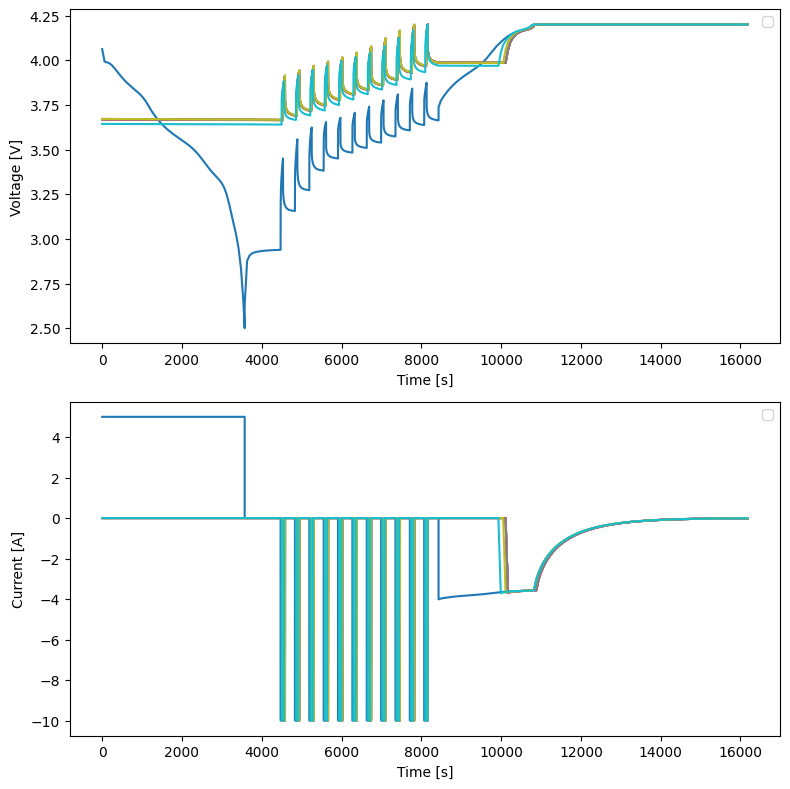

In [6]:
#Define plotting function

def plot_given_range(solution, start:int, end:int, num_entries:int) -> None:
    '''
    Takes input solution, start and end cycle number, and number of entries to plot
    Plots the voltage and current for the given range of cycles
    '''
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    solutions = solution[start:end]

    for sol in solutions:
        t = sol["Time [s]"].entries
        V = sol["Terminal voltage [V]"].entries
        I = sol["Current [A]"].entries
        ax[0].plot(t[:num_entries], V[len(V) - num_entries:])
        ax[1].plot(t[:num_entries], I[len(I) - num_entries:])

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()
    
num_entries, solution = fast(rg-1, [])
plot_given_range(solution, 0, rg, num_entries)


In [6]:
from typing import final

# Define function for simulating experiment
def fast(num_cycles: int, solution_list) -> tuple[int, list]:
    '''
    Takes input number of cycles to simulate, and list of previous simulations
    returns number of entries in solution, and list of solutions
    '''
    n_C: str = "5"
    rt: str = "5"
    cycle1: list[str] = ["Discharge at 5A until 2.5V", "Rest for 15 minutes"]
    cycle2: list[str] = cycle_with_params(n_C, rt)
    solution: list[pybamm.Solution] = solution_list
    num_entries = 0

    exp1 = pybamm.Experiment(operating_conditions=[tuple(cycle1)])
    sim1 = pybamm.Simulation(spm, experiment=exp1, parameter_values=params)
    exp2 = pybamm.Experiment(operating_conditions=[tuple(cycle2)])
    sim2 = pybamm.Simulation(spm, experiment=exp2, parameter_values=params)

    # When the simulation is run for the first time, the starting_solution is not defined
    if solution == []:
        sol1 = sim1.solve()
        pulse_duration = 360  # Pulse duration is total duration of cycle (1 + 5) minutes
        while pulse_duration == 360:
            # End time before solving
            initial_time = sol1["Time [s]"].entries[-1]
            sol1 = sim2.solve(starting_solution=sol1)
            # End time after solving
            final_time = sol1["Time [s]"].entries[-1]

            pulse_duration = final_time - initial_time
            print(pulse_duration)

        num_entries = len(sol1["Time [s]"].entries)
        # solving and writing results to variable sol1
        solution.append(sol1)  # writing sol1 to solution array

    for i in range(num_cycles):
        sol2 = sim1.solve(starting_solution=solution[-1])
        pulse_duration = 360  # Pulse duration is total duration of cycle (1 + 5) minutes
        while pulse_duration == 360:
            # End time before solving
            initial_time = sol2["Time [s]"].entries[-1]
            sol2 = sim2.solve(starting_solution=sol2)
            # End time after solving
            final_time = sol2["Time [s]"].entries[-1]

            pulse_duration = final_time - initial_time
            print(pulse_duration)
        solution.append(sol2)

    return num_entries, solution


In [9]:
#Define plotting function

def plot_given_range(solution, start:int, end:int, num_entries:int) -> None:
    '''
    Takes input solution, start and end cycle number, and number of entries to plot
    Plots the voltage and current for the given range of cycles
    '''
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    solutions = solution[start:end]

    for sol in solutions:
        t = sol["Time [s]"].entries
        V = sol["Terminal voltage [V]"].entries
        I = sol["Current [A]"].entries
        ax[0].plot(t[:num_entries], V[len(V) - num_entries:])
        ax[1].plot(t[:num_entries], I[len(I) - num_entries:])

    ax[0].set_xlabel("Time [s]")
    ax[0].set_ylabel("Voltage [V]")
    ax[1].set_xlabel("Time [s]")
    ax[1].set_ylabel("Current [A]")
    ax[0].legend()
    ax[1].legend()
    plt.tight_layout()
    plt.show()


2023-06-30 06:52:50.689 - [NOTICE] logger.func(15): Cycle 1/1 (4.360 ms elapsed) --------------------
2023-06-30 06:52:50.690 - [NOTICE] logger.func(15): Cycle 1/1, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:52:50.854 - [NOTICE] logger.func(15): Cycle 1/1, step 2/2: Rest for 15 minutes
2023-06-30 06:52:51.115 - [NOTICE] logger.func(15): Finish experiment simulation, took 429.958 ms
2023-06-30 06:52:51.494 - [NOTICE] logger.func(15): Cycle 2/2 (118.900 us elapsed) --------------------
2023-06-30 06:52:51.495 - [NOTICE] logger.func(15): Cycle 2/2, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:51.548 - [NOTICE] logger.func(15): Cycle 2/2, step 2/2: Rest for 5 minutes
2023-06-30 06:52:52.004 - [NOTICE] logger.func(15): Finish experiment simulation, took 509.860 ms
2023-06-30 06:52:52.018 - [NOTICE] logger.func(15): Cycle 3/3 (306.200 us elapsed) --------------------
2023-06-30 06:52:52.019 - [NOTICE] logger.func(15): Cycle 3/3, step 1/2: Charge at 5 C for 1 m

360.0


2023-06-30 06:52:52.302 - [NOTICE] logger.func(15): Finish experiment simulation, took 284.789 ms
2023-06-30 06:52:52.313 - [NOTICE] logger.func(15): Cycle 4/4 (109.900 us elapsed) --------------------
2023-06-30 06:52:52.314 - [NOTICE] logger.func(15): Cycle 4/4, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:52.320 - [NOTICE] logger.func(15): Cycle 4/4, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:52.609 - [NOTICE] logger.func(15): Finish experiment simulation, took 296.581 ms
2023-06-30 06:52:52.632 - [NOTICE] logger.func(15): Cycle 5/5 (451.700 us elapsed) --------------------
2023-06-30 06:52:52.634 - [NOTICE] logger.func(15): Cycle 5/5, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:52.645 - [NOTICE] logger.func(15): Cycle 5/5, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:53.018 - [NOTICE] logger.func(15): Finish experiment simulation, took 385.106 ms
2023-06-30 06:52:53.039 - [NOTICE] logger.func(15): Cycle 6/6 (68.600 us elapsed) --------------------
2023-06-30 06:52:53.040 - [NOTICE] logger.func(15): Cycle 6/6, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:53.051 - [NOTICE] logger.func(15): Cycle 6/6, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:53.293 - [NOTICE] logger.func(15): Finish experiment simulation, took 253.844 ms
2023-06-30 06:52:53.318 - [NOTICE] logger.func(15): Cycle 7/7 (100.700 us elapsed) --------------------
2023-06-30 06:52:53.321 - [NOTICE] logger.func(15): Cycle 7/7, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:53.328 - [NOTICE] logger.func(15): Cycle 7/7, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:53.528 - [NOTICE] logger.func(15): Finish experiment simulation, took 210.480 ms
2023-06-30 06:52:53.554 - [NOTICE] logger.func(15): Cycle 8/8 (80.300 us elapsed) --------------------
2023-06-30 06:52:53.555 - [NOTICE] logger.func(15): Cycle 8/8, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:53.568 - [NOTICE] logger.func(15): Cycle 8/8, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:53.771 - [NOTICE] logger.func(15): Finish experiment simulation, took 215.375 ms
2023-06-30 06:52:53.816 - [NOTICE] logger.func(15): Cycle 9/9 (85.800 us elapsed) --------------------
2023-06-30 06:52:53.818 - [NOTICE] logger.func(15): Cycle 9/9, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:52:53.842 - [NOTICE] logger.func(15): Cycle 9/9, step 2/2: Rest for 15 minutes


340.9831834970091


2023-06-30 06:52:54.142 - [NOTICE] logger.func(15): Finish experiment simulation, took 325.992 ms
2023-06-30 06:52:54.179 - [NOTICE] logger.func(15): Cycle 10/10 (136.400 us elapsed) --------------------
2023-06-30 06:52:54.181 - [NOTICE] logger.func(15): Cycle 10/10, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:54.188 - [NOTICE] logger.func(15): Cycle 10/10, step 2/2: Rest for 5 minutes
2023-06-30 06:52:54.481 - [NOTICE] logger.func(15): Finish experiment simulation, took 301.420 ms
2023-06-30 06:52:54.544 - [NOTICE] logger.func(15): Cycle 11/11 (89.500 us elapsed) --------------------
2023-06-30 06:52:54.545 - [NOTICE] logger.func(15): Cycle 11/11, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:54.563 - [NOTICE] logger.func(15): Cycle 11/11, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:54.829 - [NOTICE] logger.func(15): Finish experiment simulation, took 284.608 ms
2023-06-30 06:52:54.877 - [NOTICE] logger.func(15): Cycle 12/12 (78.000 us elapsed) --------------------
2023-06-30 06:52:54.877 - [NOTICE] logger.func(15): Cycle 12/12, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:54.884 - [NOTICE] logger.func(15): Cycle 12/12, step 2/2: Rest for 5 minutes
2023-06-30 06:52:55.079 - [NOTICE] logger.func(15): Finish experiment simulation, took 201.995 ms


360.0


2023-06-30 06:52:55.135 - [NOTICE] logger.func(15): Cycle 13/13 (63.400 us elapsed) --------------------
2023-06-30 06:52:55.136 - [NOTICE] logger.func(15): Cycle 13/13, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:55.144 - [NOTICE] logger.func(15): Cycle 13/13, step 2/2: Rest for 5 minutes
2023-06-30 06:52:55.329 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.293 ms


360.0


2023-06-30 06:52:55.388 - [NOTICE] logger.func(15): Cycle 14/14 (72.900 us elapsed) --------------------
2023-06-30 06:52:55.389 - [NOTICE] logger.func(15): Cycle 14/14, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:55.394 - [NOTICE] logger.func(15): Cycle 14/14, step 2/2: Rest for 5 minutes
2023-06-30 06:52:55.578 - [NOTICE] logger.func(15): Finish experiment simulation, took 190.304 ms


360.0


2023-06-30 06:52:55.639 - [NOTICE] logger.func(15): Cycle 15/15 (64.100 us elapsed) --------------------
2023-06-30 06:52:55.640 - [NOTICE] logger.func(15): Cycle 15/15, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:55.645 - [NOTICE] logger.func(15): Cycle 15/15, step 2/2: Rest for 5 minutes
2023-06-30 06:52:55.830 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.307 ms


360.0


2023-06-30 06:52:55.884 - [NOTICE] logger.func(15): Cycle 16/16 (64.100 us elapsed) --------------------
2023-06-30 06:52:55.885 - [NOTICE] logger.func(15): Cycle 16/16, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:55.893 - [NOTICE] logger.func(15): Cycle 16/16, step 2/2: Rest for 5 minutes
2023-06-30 06:52:56.083 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.543 ms


360.0


2023-06-30 06:52:56.151 - [NOTICE] logger.func(15): Cycle 17/17 (64.500 us elapsed) --------------------
2023-06-30 06:52:56.152 - [NOTICE] logger.func(15): Cycle 17/17, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:52:56.162 - [NOTICE] logger.func(15): Cycle 17/17, step 2/2: Rest for 15 minutes
2023-06-30 06:52:56.344 - [NOTICE] logger.func(15): Finish experiment simulation, took 192.962 ms


340.92831020978883


2023-06-30 06:52:56.414 - [NOTICE] logger.func(15): Cycle 18/18 (62.900 us elapsed) --------------------
2023-06-30 06:52:56.414 - [NOTICE] logger.func(15): Cycle 18/18, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:56.419 - [NOTICE] logger.func(15): Cycle 18/18, step 2/2: Rest for 5 minutes
2023-06-30 06:52:56.755 - [NOTICE] logger.func(15): Finish experiment simulation, took 340.008 ms
2023-06-30 06:52:56.822 - [NOTICE] logger.func(15): Cycle 19/19 (160.100 us elapsed) --------------------
2023-06-30 06:52:56.823 - [NOTICE] logger.func(15): Cycle 19/19, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:56.828 - [NOTICE] logger.func(15): Cycle 19/19, step 2/2: Rest for 5 minutes
2023-06-30 06:52:57.008 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.715 ms


360.0


2023-06-30 06:52:57.083 - [NOTICE] logger.func(15): Cycle 20/20 (59.400 us elapsed) --------------------
2023-06-30 06:52:57.084 - [NOTICE] logger.func(15): Cycle 20/20, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:57.088 - [NOTICE] logger.func(15): Cycle 20/20, step 2/2: Rest for 5 minutes
2023-06-30 06:52:57.267 - [NOTICE] logger.func(15): Finish experiment simulation, took 183.384 ms


360.0


2023-06-30 06:52:57.346 - [NOTICE] logger.func(15): Cycle 21/21 (104.900 us elapsed) --------------------
2023-06-30 06:52:57.347 - [NOTICE] logger.func(15): Cycle 21/21, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:57.353 - [NOTICE] logger.func(15): Cycle 21/21, step 2/2: Rest for 5 minutes
2023-06-30 06:52:57.547 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.345 ms


360.0


2023-06-30 06:52:57.623 - [NOTICE] logger.func(15): Cycle 22/22 (64.600 us elapsed) --------------------
2023-06-30 06:52:57.624 - [NOTICE] logger.func(15): Cycle 22/22, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:57.630 - [NOTICE] logger.func(15): Cycle 22/22, step 2/2: Rest for 5 minutes
2023-06-30 06:52:57.824 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.211 ms


360.0


2023-06-30 06:52:57.918 - [NOTICE] logger.func(15): Cycle 23/23 (163.700 us elapsed) --------------------
2023-06-30 06:52:57.919 - [NOTICE] logger.func(15): Cycle 23/23, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:57.923 - [NOTICE] logger.func(15): Cycle 23/23, step 2/2: Rest for 5 minutes
2023-06-30 06:52:58.107 - [NOTICE] logger.func(15): Finish experiment simulation, took 189.311 ms


360.0


2023-06-30 06:52:58.198 - [NOTICE] logger.func(15): Cycle 24/24 (60.900 us elapsed) --------------------
2023-06-30 06:52:58.199 - [NOTICE] logger.func(15): Cycle 24/24, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:58.206 - [NOTICE] logger.func(15): Cycle 24/24, step 2/2: Rest for 5 minutes
2023-06-30 06:52:58.387 - [NOTICE] logger.func(15): Finish experiment simulation, took 189.089 ms


360.0


2023-06-30 06:52:58.485 - [NOTICE] logger.func(15): Cycle 25/25 (60.000 us elapsed) --------------------
2023-06-30 06:52:58.485 - [NOTICE] logger.func(15): Cycle 25/25, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:52:58.496 - [NOTICE] logger.func(15): Cycle 25/25, step 2/2: Rest for 15 minutes
2023-06-30 06:52:58.675 - [NOTICE] logger.func(15): Finish experiment simulation, took 190.336 ms


340.8634774061902


2023-06-30 06:52:58.769 - [NOTICE] logger.func(15): Cycle 26/26 (65.000 us elapsed) --------------------
2023-06-30 06:52:58.770 - [NOTICE] logger.func(15): Cycle 26/26, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:58.774 - [NOTICE] logger.func(15): Cycle 26/26, step 2/2: Rest for 5 minutes
2023-06-30 06:52:58.961 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.848 ms
2023-06-30 06:52:59.054 - [NOTICE] logger.func(15): Cycle 27/27 (68.500 us elapsed) --------------------
2023-06-30 06:52:59.054 - [NOTICE] logger.func(15): Cycle 27/27, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:59.060 - [NOTICE] logger.func(15): Cycle 27/27, step 2/2: Rest for 5 minutes
2023-06-30 06:52:59.239 - [NOTICE] logger.func(15): Finish experiment simulation, took 184.472 ms


360.0


2023-06-30 06:52:59.342 - [NOTICE] logger.func(15): Cycle 28/28 (59.900 us elapsed) --------------------
2023-06-30 06:52:59.342 - [NOTICE] logger.func(15): Cycle 28/28, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:59.347 - [NOTICE] logger.func(15): Cycle 28/28, step 2/2: Rest for 5 minutes
2023-06-30 06:52:59.532 - [NOTICE] logger.func(15): Finish experiment simulation, took 189.476 ms


360.0


2023-06-30 06:52:59.641 - [NOTICE] logger.func(15): Cycle 29/29 (68.700 us elapsed) --------------------
2023-06-30 06:52:59.641 - [NOTICE] logger.func(15): Cycle 29/29, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:52:59.646 - [NOTICE] logger.func(15): Cycle 29/29, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:52:59.975 - [NOTICE] logger.func(15): Finish experiment simulation, took 333.813 ms
2023-06-30 06:53:00.082 - [NOTICE] logger.func(15): Cycle 30/30 (63.700 us elapsed) --------------------
2023-06-30 06:53:00.083 - [NOTICE] logger.func(15): Cycle 30/30, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:00.087 - [NOTICE] logger.func(15): Cycle 30/30, step 2/2: Rest for 5 minutes
2023-06-30 06:53:00.268 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.975 ms


360.0


2023-06-30 06:53:00.413 - [NOTICE] logger.func(15): Cycle 31/31 (63.100 us elapsed) --------------------
2023-06-30 06:53:00.414 - [NOTICE] logger.func(15): Cycle 31/31, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:00.418 - [NOTICE] logger.func(15): Cycle 31/31, step 2/2: Rest for 5 minutes
2023-06-30 06:53:00.600 - [NOTICE] logger.func(15): Finish experiment simulation, took 186.077 ms


360.0


2023-06-30 06:53:00.727 - [NOTICE] logger.func(15): Cycle 32/32 (68.900 us elapsed) --------------------
2023-06-30 06:53:00.727 - [NOTICE] logger.func(15): Cycle 32/32, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:00.734 - [NOTICE] logger.func(15): Cycle 32/32, step 2/2: Rest for 5 minutes
2023-06-30 06:53:00.928 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.455 ms


360.0


2023-06-30 06:53:01.051 - [NOTICE] logger.func(15): Cycle 33/33 (64.400 us elapsed) --------------------
2023-06-30 06:53:01.052 - [NOTICE] logger.func(15): Cycle 33/33, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:53:01.062 - [NOTICE] logger.func(15): Cycle 33/33, step 2/2: Rest for 15 minutes
2023-06-30 06:53:01.251 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.326 ms


340.7987534891254


2023-06-30 06:53:01.375 - [NOTICE] logger.func(15): Cycle 34/34 (65.900 us elapsed) --------------------
2023-06-30 06:53:01.376 - [NOTICE] logger.func(15): Cycle 34/34, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:01.380 - [NOTICE] logger.func(15): Cycle 34/34, step 2/2: Rest for 5 minutes
2023-06-30 06:53:01.562 - [NOTICE] logger.func(15): Finish experiment simulation, took 186.542 ms
2023-06-30 06:53:01.683 - [NOTICE] logger.func(15): Cycle 35/35 (65.800 us elapsed) --------------------
2023-06-30 06:53:01.684 - [NOTICE] logger.func(15): Cycle 35/35, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:01.688 - [NOTICE] logger.func(15): Cycle 35/35, step 2/2: Rest for 5 minutes
2023-06-30 06:53:01.874 - [NOTICE] logger.func(15): Finish experiment simulation, took 190.187 ms


360.0


2023-06-30 06:53:02.001 - [NOTICE] logger.func(15): Cycle 36/36 (124.300 us elapsed) --------------------
2023-06-30 06:53:02.002 - [NOTICE] logger.func(15): Cycle 36/36, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:02.007 - [NOTICE] logger.func(15): Cycle 36/36, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:02.244 - [NOTICE] logger.func(15): Finish experiment simulation, took 242.858 ms
2023-06-30 06:53:02.378 - [NOTICE] logger.func(15): Cycle 37/37 (65.300 us elapsed) --------------------
2023-06-30 06:53:02.379 - [NOTICE] logger.func(15): Cycle 37/37, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:02.383 - [NOTICE] logger.func(15): Cycle 37/37, step 2/2: Rest for 5 minutes
2023-06-30 06:53:02.568 - [NOTICE] logger.func(15): Finish experiment simulation, took 189.931 ms


360.0


2023-06-30 06:53:02.710 - [NOTICE] logger.func(15): Cycle 38/38 (76.300 us elapsed) --------------------
2023-06-30 06:53:02.711 - [NOTICE] logger.func(15): Cycle 38/38, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:02.715 - [NOTICE] logger.func(15): Cycle 38/38, step 2/2: Rest for 5 minutes
2023-06-30 06:53:02.904 - [NOTICE] logger.func(15): Finish experiment simulation, took 193.591 ms


360.0


2023-06-30 06:53:03.048 - [NOTICE] logger.func(15): Cycle 39/39 (70.700 us elapsed) --------------------
2023-06-30 06:53:03.048 - [NOTICE] logger.func(15): Cycle 39/39, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:03.053 - [NOTICE] logger.func(15): Cycle 39/39, step 2/2: Rest for 5 minutes
2023-06-30 06:53:03.234 - [NOTICE] logger.func(15): Finish experiment simulation, took 185.455 ms


360.0


2023-06-30 06:53:03.384 - [NOTICE] logger.func(15): Cycle 40/40 (112.900 us elapsed) --------------------
2023-06-30 06:53:03.385 - [NOTICE] logger.func(15): Cycle 40/40, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:03.391 - [NOTICE] logger.func(15): Cycle 40/40, step 2/2: Rest for 5 minutes
2023-06-30 06:53:03.571 - [NOTICE] logger.func(15): Finish experiment simulation, took 186.472 ms


360.0


2023-06-30 06:53:03.719 - [NOTICE] logger.func(15): Cycle 41/41 (63.200 us elapsed) --------------------
2023-06-30 06:53:03.719 - [NOTICE] logger.func(15): Cycle 41/41, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:53:03.729 - [NOTICE] logger.func(15): Cycle 41/41, step 2/2: Rest for 15 minutes
2023-06-30 06:53:03.910 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.044 ms


340.7340961495174


2023-06-30 06:53:04.062 - [NOTICE] logger.func(15): Cycle 42/42 (76.700 us elapsed) --------------------
2023-06-30 06:53:04.062 - [NOTICE] logger.func(15): Cycle 42/42, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:04.067 - [NOTICE] logger.func(15): Cycle 42/42, step 2/2: Rest for 5 minutes
2023-06-30 06:53:04.540 - [NOTICE] logger.func(15): Finish experiment simulation, took 476.163 ms
2023-06-30 06:53:04.791 - [NOTICE] logger.func(15): Cycle 43/43 (72.000 us elapsed) --------------------
2023-06-30 06:53:04.792 - [NOTICE] logger.func(15): Cycle 43/43, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:04.806 - [NOTICE] logger.func(15): Cycle 43/43, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:05.170 - [NOTICE] logger.func(15): Finish experiment simulation, took 378.244 ms
2023-06-30 06:53:05.457 - [NOTICE] logger.func(15): Cycle 44/44 (67.200 us elapsed) --------------------
2023-06-30 06:53:05.457 - [NOTICE] logger.func(15): Cycle 44/44, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:05.473 - [NOTICE] logger.func(15): Cycle 44/44, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:05.866 - [NOTICE] logger.func(15): Finish experiment simulation, took 408.881 ms
2023-06-30 06:53:06.103 - [NOTICE] logger.func(15): Cycle 45/45 (93.400 us elapsed) --------------------
2023-06-30 06:53:06.105 - [NOTICE] logger.func(15): Cycle 45/45, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:06.114 - [NOTICE] logger.func(15): Cycle 45/45, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:06.449 - [NOTICE] logger.func(15): Finish experiment simulation, took 343.892 ms
2023-06-30 06:53:06.681 - [NOTICE] logger.func(15): Cycle 46/46 (291.600 us elapsed) --------------------
2023-06-30 06:53:06.683 - [NOTICE] logger.func(15): Cycle 46/46, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:53:06.702 - [NOTICE] logger.func(15): Cycle 46/46, step 2/2: Rest for 15 minutes


359.99999999999636


2023-06-30 06:53:07.021 - [NOTICE] logger.func(15): Finish experiment simulation, took 337.916 ms
2023-06-30 06:53:07.255 - [NOTICE] logger.func(15): Cycle 47/47 (89.600 us elapsed) --------------------
2023-06-30 06:53:07.256 - [NOTICE] logger.func(15): Cycle 47/47, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:07.267 - [NOTICE] logger.func(15): Cycle 47/47, step 2/2: Rest for 5 minutes
2023-06-30 06:53:07.565 - [NOTICE] logger.func(15): Finish experiment simulation, took 309.975 ms
2023-06-30 06:53:07.835 - [NOTICE] logger.func(15): Cycle 48/48 (82.600 us elapsed) --------------------
2023-06-30 06:53:07.835 - [NOTICE] logger.func(15): Cycle 48/48, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:07.847 - [NOTICE] logger.func(15): Cycle 48/48, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:08.142 - [NOTICE] logger.func(15): Finish experiment simulation, took 307.257 ms
2023-06-30 06:53:08.404 - [NOTICE] logger.func(15): Cycle 49/49 (74.200 us elapsed) --------------------
2023-06-30 06:53:08.405 - [NOTICE] logger.func(15): Cycle 49/49, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:08.412 - [NOTICE] logger.func(15): Cycle 49/49, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:08.736 - [NOTICE] logger.func(15): Finish experiment simulation, took 329.006 ms
2023-06-30 06:53:08.978 - [NOTICE] logger.func(15): Cycle 50/50 (65.300 us elapsed) --------------------
2023-06-30 06:53:08.979 - [NOTICE] logger.func(15): Cycle 50/50, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:08.983 - [NOTICE] logger.func(15): Cycle 50/50, step 2/2: Rest for 5 minutes
2023-06-30 06:53:09.175 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.345 ms


360.0


2023-06-30 06:53:09.413 - [NOTICE] logger.func(15): Cycle 51/51 (66.300 us elapsed) --------------------
2023-06-30 06:53:09.414 - [NOTICE] logger.func(15): Cycle 51/51, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:09.419 - [NOTICE] logger.func(15): Cycle 51/51, step 2/2: Rest for 5 minutes
2023-06-30 06:53:09.610 - [NOTICE] logger.func(15): Finish experiment simulation, took 195.786 ms


360.0


2023-06-30 06:53:09.801 - [NOTICE] logger.func(15): Cycle 52/52 (70.700 us elapsed) --------------------
2023-06-30 06:53:09.802 - [NOTICE] logger.func(15): Cycle 52/52, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:09.806 - [NOTICE] logger.func(15): Cycle 52/52, step 2/2: Rest for 5 minutes
2023-06-30 06:53:09.993 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.633 ms


360.0


2023-06-30 06:53:10.231 - [NOTICE] logger.func(15): Cycle 53/53 (78.600 us elapsed) --------------------
2023-06-30 06:53:10.233 - [NOTICE] logger.func(15): Cycle 53/53, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:10.251 - [NOTICE] logger.func(15): Cycle 53/53, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:10.581 - [NOTICE] logger.func(15): Finish experiment simulation, took 348.337 ms
2023-06-30 06:53:10.781 - [NOTICE] logger.func(15): Cycle 54/54 (74.200 us elapsed) --------------------
2023-06-30 06:53:10.782 - [NOTICE] logger.func(15): Cycle 54/54, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:53:10.791 - [NOTICE] logger.func(15): Cycle 54/54, step 2/2: Rest for 15 minutes
2023-06-30 06:53:10.979 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.861 ms


340.68635932172765


2023-06-30 06:53:11.181 - [NOTICE] logger.func(15): Cycle 55/55 (244.900 us elapsed) --------------------
2023-06-30 06:53:11.182 - [NOTICE] logger.func(15): Cycle 55/55, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:11.186 - [NOTICE] logger.func(15): Cycle 55/55, step 2/2: Rest for 5 minutes
2023-06-30 06:53:11.380 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.772 ms
2023-06-30 06:53:11.575 - [NOTICE] logger.func(15): Cycle 56/56 (81.500 us elapsed) --------------------
2023-06-30 06:53:11.576 - [NOTICE] logger.func(15): Cycle 56/56, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:11.581 - [NOTICE] logger.func(15): Cycle 56/56, step 2/2: Rest for 5 minutes
2023-06-30 06:53:11.775 - [NOTICE] logger.func(15): Finish experiment simulation, took 198.203 ms


360.0


2023-06-30 06:53:12.037 - [NOTICE] logger.func(15): Cycle 57/57 (64.600 us elapsed) --------------------
2023-06-30 06:53:12.039 - [NOTICE] logger.func(15): Cycle 57/57, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:12.042 - [NOTICE] logger.func(15): Cycle 57/57, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:12.233 - [NOTICE] logger.func(15): Finish experiment simulation, took 194.618 ms
2023-06-30 06:53:12.442 - [NOTICE] logger.func(15): Cycle 58/58 (69.800 us elapsed) --------------------
2023-06-30 06:53:12.443 - [NOTICE] logger.func(15): Cycle 58/58, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:12.448 - [NOTICE] logger.func(15): Cycle 58/58, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:12.794 - [NOTICE] logger.func(15): Finish experiment simulation, took 352.048 ms
2023-06-30 06:53:12.995 - [NOTICE] logger.func(15): Cycle 59/59 (65.800 us elapsed) --------------------
2023-06-30 06:53:12.995 - [NOTICE] logger.func(15): Cycle 59/59, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:13.000 - [NOTICE] logger.func(15): Cycle 59/59, step 2/2: Rest for 5 minutes
2023-06-30 06:53:13.178 - [NOTICE] logger.func(15): Finish experiment simulation, took 182.401 ms


360.0


2023-06-30 06:53:13.386 - [NOTICE] logger.func(15): Cycle 60/60 (64.300 us elapsed) --------------------
2023-06-30 06:53:13.386 - [NOTICE] logger.func(15): Cycle 60/60, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:13.391 - [NOTICE] logger.func(15): Cycle 60/60, step 2/2: Rest for 5 minutes
2023-06-30 06:53:13.577 - [NOTICE] logger.func(15): Finish experiment simulation, took 190.213 ms


360.0


2023-06-30 06:53:13.791 - [NOTICE] logger.func(15): Cycle 61/61 (67.900 us elapsed) --------------------
2023-06-30 06:53:13.792 - [NOTICE] logger.func(15): Cycle 61/61, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:13.798 - [NOTICE] logger.func(15): Cycle 61/61, step 2/2: Rest for 5 minutes
2023-06-30 06:53:13.988 - [NOTICE] logger.func(15): Finish experiment simulation, took 196.320 ms


360.0


2023-06-30 06:53:14.210 - [NOTICE] logger.func(15): Cycle 62/62 (61.800 us elapsed) --------------------
2023-06-30 06:53:14.212 - [NOTICE] logger.func(15): Cycle 62/62, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:53:14.223 - [NOTICE] logger.func(15): Cycle 62/62, step 2/2: Rest for 15 minutes


340.58076496687136


2023-06-30 06:53:14.528 - [NOTICE] logger.func(15): Finish experiment simulation, took 314.671 ms
2023-06-30 06:53:14.896 - [NOTICE] logger.func(15): Cycle 63/63 (92.400 us elapsed) --------------------
2023-06-30 06:53:14.897 - [NOTICE] logger.func(15): Cycle 63/63, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:14.907 - [NOTICE] logger.func(15): Cycle 63/63, step 2/2: Rest for 5 minutes
2023-06-30 06:53:15.266 - [NOTICE] logger.func(15): Finish experiment simulation, took 369.659 ms
2023-06-30 06:53:15.547 - [NOTICE] logger.func(15): Cycle 64/64 (93.500 us elapsed) --------------------
2023-06-30 06:53:15.548 - [NOTICE] logger.func(15): Cycle 64/64, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:15.556 - [NOTICE] logger.func(15): Cycle 64/64, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:15.770 - [NOTICE] logger.func(15): Finish experiment simulation, took 221.327 ms
2023-06-30 06:53:16.030 - [NOTICE] logger.func(15): Cycle 65/65 (71.100 us elapsed) --------------------
2023-06-30 06:53:16.031 - [NOTICE] logger.func(15): Cycle 65/65, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:16.037 - [NOTICE] logger.func(15): Cycle 65/65, step 2/2: Rest for 5 minutes
2023-06-30 06:53:16.230 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.332 ms


360.0


2023-06-30 06:53:16.481 - [NOTICE] logger.func(15): Cycle 66/66 (157.500 us elapsed) --------------------
2023-06-30 06:53:16.484 - [NOTICE] logger.func(15): Cycle 66/66, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:16.493 - [NOTICE] logger.func(15): Cycle 66/66, step 2/2: Rest for 5 minutes
2023-06-30 06:53:16.687 - [NOTICE] logger.func(15): Finish experiment simulation, took 205.030 ms


360.0


2023-06-30 06:53:16.933 - [NOTICE] logger.func(15): Cycle 67/67 (61.800 us elapsed) --------------------
2023-06-30 06:53:16.934 - [NOTICE] logger.func(15): Cycle 67/67, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:16.938 - [NOTICE] logger.func(15): Cycle 67/67, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:17.146 - [NOTICE] logger.func(15): Finish experiment simulation, took 211.781 ms
2023-06-30 06:53:17.483 - [NOTICE] logger.func(15): Cycle 68/68 (125.700 us elapsed) --------------------
2023-06-30 06:53:17.484 - [NOTICE] logger.func(15): Cycle 68/68, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:17.491 - [NOTICE] logger.func(15): Cycle 68/68, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:17.746 - [NOTICE] logger.func(15): Finish experiment simulation, took 261.599 ms
2023-06-30 06:53:18.032 - [NOTICE] logger.func(15): Cycle 69/69 (65.700 us elapsed) --------------------
2023-06-30 06:53:18.032 - [NOTICE] logger.func(15): Cycle 69/69, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:18.039 - [NOTICE] logger.func(15): Cycle 69/69, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:18.232 - [NOTICE] logger.func(15): Finish experiment simulation, took 199.844 ms
2023-06-30 06:53:18.489 - [NOTICE] logger.func(15): Cycle 70/70 (63.700 us elapsed) --------------------
2023-06-30 06:53:18.491 - [NOTICE] logger.func(15): Cycle 70/70, step 1/2: Discharge at 5A until 2.5V
2023-06-30 06:53:18.501 - [NOTICE] logger.func(15): Cycle 70/70, step 2/2: Rest for 15 minutes


340.5163579314103


2023-06-30 06:53:18.690 - [NOTICE] logger.func(15): Finish experiment simulation, took 200.239 ms
2023-06-30 06:53:18.957 - [NOTICE] logger.func(15): Cycle 71/71 (106.100 us elapsed) --------------------
2023-06-30 06:53:18.958 - [NOTICE] logger.func(15): Cycle 71/71, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:18.962 - [NOTICE] logger.func(15): Cycle 71/71, step 2/2: Rest for 5 minutes
2023-06-30 06:53:19.259 - [NOTICE] logger.func(15): Finish experiment simulation, took 298.334 ms
2023-06-30 06:53:19.646 - [NOTICE] logger.func(15): Cycle 72/72 (382.200 us elapsed) --------------------
2023-06-30 06:53:19.647 - [NOTICE] logger.func(15): Cycle 72/72, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:19.655 - [NOTICE] logger.func(15): Cycle 72/72, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:19.892 - [NOTICE] logger.func(15): Finish experiment simulation, took 245.225 ms
2023-06-30 06:53:20.166 - [NOTICE] logger.func(15): Cycle 73/73 (65.800 us elapsed) --------------------
2023-06-30 06:53:20.167 - [NOTICE] logger.func(15): Cycle 73/73, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:20.171 - [NOTICE] logger.func(15): Cycle 73/73, step 2/2: Rest for 5 minutes
2023-06-30 06:53:20.359 - [NOTICE] logger.func(15): Finish experiment simulation, took 191.883 ms


360.0


2023-06-30 06:53:20.636 - [NOTICE] logger.func(15): Cycle 74/74 (69.000 us elapsed) --------------------
2023-06-30 06:53:20.637 - [NOTICE] logger.func(15): Cycle 74/74, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:20.641 - [NOTICE] logger.func(15): Cycle 74/74, step 2/2: Rest for 5 minutes
2023-06-30 06:53:20.845 - [NOTICE] logger.func(15): Finish experiment simulation, took 208.315 ms


360.0


2023-06-30 06:53:21.191 - [NOTICE] logger.func(15): Cycle 75/75 (91.100 us elapsed) --------------------
2023-06-30 06:53:21.193 - [NOTICE] logger.func(15): Cycle 75/75, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:21.204 - [NOTICE] logger.func(15): Cycle 75/75, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:21.572 - [NOTICE] logger.func(15): Finish experiment simulation, took 379.491 ms
2023-06-30 06:53:21.962 - [NOTICE] logger.func(15): Cycle 76/76 (111.000 us elapsed) --------------------
2023-06-30 06:53:21.963 - [NOTICE] logger.func(15): Cycle 76/76, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:21.968 - [NOTICE] logger.func(15): Cycle 76/76, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:22.200 - [NOTICE] logger.func(15): Finish experiment simulation, took 237.194 ms
2023-06-30 06:53:22.501 - [NOTICE] logger.func(15): Cycle 77/77 (66.300 us elapsed) --------------------
2023-06-30 06:53:22.501 - [NOTICE] logger.func(15): Cycle 77/77, step 1/2: Charge at 5 C for 1 minute or until 4.2 V
2023-06-30 06:53:22.508 - [NOTICE] logger.func(15): Cycle 77/77, step 2/2: Rest for 5 minutes


360.0


2023-06-30 06:53:22.916 - [NOTICE] logger.func(15): Finish experiment simulation, took 414.240 ms


340.45207365726674


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


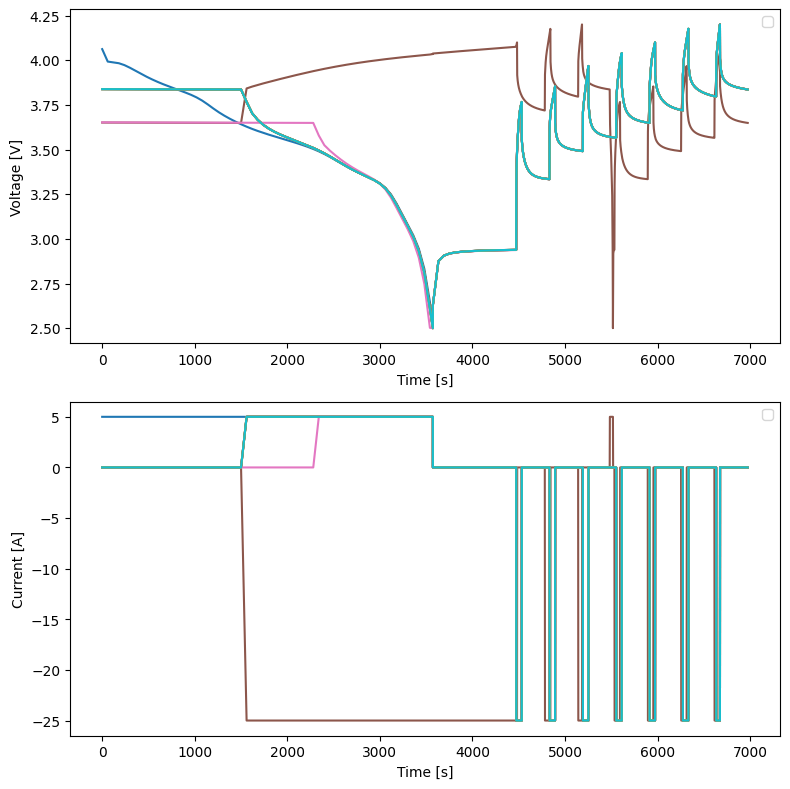

In [12]:
num_entries, solution = fast(rg-1, [])
plot_given_range(solution, 0, rg, num_entries)


In [12]:
_, solution = fast(n-rg, solution)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


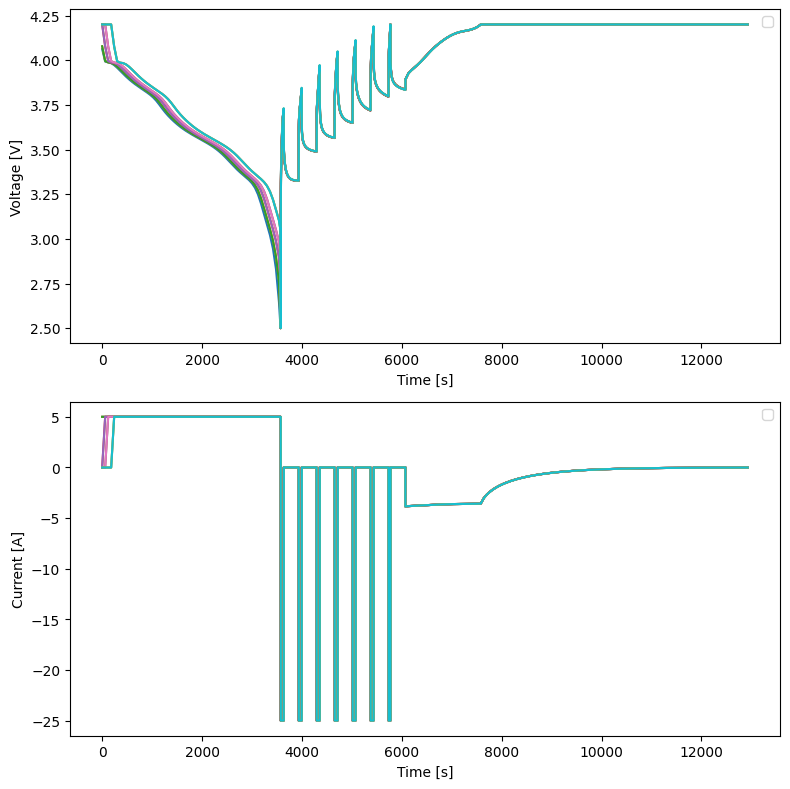

In [13]:
plot_given_range(solution, 0, rg, num_entries)

In [14]:
solution[-1].t[3800:4000]

array([17573.48658218, 17574.48658218, 17575.48658218, 17576.48658218,
       17577.48658218, 17578.48658218, 17579.48658218, 17580.48658218,
       17581.48658218, 17582.48658218, 17583.48658218, 17584.48658218,
       17585.48658218, 17586.48658218, 17587.48658218, 17588.48658218,
       17589.48658218, 17590.48658218, 17591.48658218, 17592.48658218,
       17593.48658218, 17594.48658218, 17595.48658218, 17596.48658218,
       17597.48658218, 17598.48658218, 17599.48658218, 17600.48658218,
       17601.48658218, 17602.48658218, 17603.48658218, 17604.48658218,
       17605.48658218, 17606.48658218, 17607.48658218, 17608.48658218,
       17609.48658218, 17610.48658218, 17611.48658218, 17612.48658218,
       17613.48658218, 17614.48658218, 17615.48658218, 17615.48658218,
       17616.48658218, 17617.48658218, 17618.48658218, 17619.48658218,
       17620.48658218, 17621.48658218, 17622.48658218, 17623.48658218,
       17624.48658218, 17625.48658218, 17626.48658218, 17627.48658218,
      